In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("../data/players_and_transf.csv")

### Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71584 entries, 0 to 71583
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            71584 non-null  object 
 1   club            71584 non-null  object 
 2   age             71584 non-null  int64  
 3   position        71584 non-null  object 
 4   apps            71584 non-null  object 
 5   mins            71584 non-null  int64  
 6   goals           71584 non-null  object 
 7   assists         71584 non-null  object 
 8   yel             71584 non-null  object 
 9   red             71584 non-null  object 
 10  shots           71584 non-null  object 
 11  ps%             71584 non-null  object 
 12  aerials_won     71584 non-null  object 
 13  motm            71584 non-null  object 
 14  rating          71584 non-null  float64
 15  tackles         71528 non-null  object 
 16  interceptions   71528 non-null  object 
 17  fouls           71528 non-null 

In [4]:
df.describe(include="all")

,name,club,age,position,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,motm,rating,tackles,interceptions,fouls,offsides_won,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,dispossed,bad_controls,avg_passes,crosses,long_passes,through_passes,league,season,fee,traded,club_position
count,71584,71584,71584.000000,71584,71584,71584.000000,71584,71584,71584,71584,71584,71584,71584,71584,71584.000000,71528,71528,71528,71528,71528,71528,71528,71528,71464,71464,71464,71464,71464,71464,71422,71422,71422,71422,71584,71584,17212,71584.000000,71584.000000
unique,9802,180,NaN,30,674,NaN,45,22,19,6,66,691,92,22,NaN,62,61,44,30,129,41,27,5,43,59,52,28,51,53,885,37,154,14,5,13,529,NaN,NaN
top,Felipe,Genoa,NaN,FW,0(1),NaN,-,-,-,-,-,100,-,-,NaN,-,-,-,-,-,-,-,-,-,-,-,-,-,-,3,-,-,-,Serie A,2021/2022,loan transfer,NaN,NaN
freq,50,882,NaN,17092,3610,NaN,37596,38428,19712,62122,12994,1378,9244,47234,NaN,9692,11938,9430,46500,9274,11232,30312,68002,13912,15472,8320,40568,13434,14952,596,30918,7084,53820,15604,5872,4456,NaN,NaN
mean,NaN,NaN,26.672078,NaN,NaN,1308.066831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.647972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.240445,10.543641
std,NaN,NaN,4.492886,NaN,NaN,994.409257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.385151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.427357,5.702612
min,NaN,NaN,16.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.770000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
25%,NaN,NaN,23.000000,NaN,NaN,366.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.380000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,6.000000
50%,NaN,NaN,26.000000,NaN,NaN,1188.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.650000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,11.000000
75%,NaN,NaN,30.000000,NaN,NaN,2140.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,15.000000


#### First Actions:
 * Add both values when apps is like x(y)
 
 * Transform "-" in na
 
 * Standarize the positions.


In [5]:
# apps
df['apps'] = df['apps'].apply(lambda x: x.replace('(',' ').replace(')',''))
df['apps'] = df['apps'].apply(lambda x: x if len(x.split(' ')) <= 1 else int(x.split(' ')[0]) + int(x.split(' ')[1]) )

In [6]:
# - to na
df = df.replace('-',np.nan)

In [7]:
# Group the positions
df.position.value_counts()

FW            17092
D(C)           7644
M(C)           7118
DMC            5432
GK             5174
M(L)           3578
M(R)           3338
M(CLR)         3042
Midfielder     1760
M(CR)          1760
D(CR)          1656
Forward        1538
M(CL)          1448
D(CL)          1434
M(LR)          1276
D(R)           1176
D(L)           1124
AM(CLR)         964
Defender        942
AM(C)           652
D(CLR)          628
AM(LR)          602
D(LR)           434
AM(CL)          398
AM(L)           394
Goalkeeper      384
AM(R)           324
AM(CR)          264
midfielder        6
forward           2
Name: position, dtype: int64

In [8]:
df['position'] = df['position'].str.upper()
dataframes = ['FW','dataframe']
goalkeepers = ['GK','GOALKEEPER']
defenders = df[df['position'].str.startswith('D')].position.unique()
def_midfielders = df[df['position'].str.startswith('M')].position.unique()
off_midfielders = df[df['position'].str.startswith('AM')].position.unique()
def_midfielders = np.delete(def_midfielders,0)
off_midfielders = np.append(off_midfielders,'M(CLR)')

In [9]:
# Category
df['position_cat'] = df['position'].apply(lambda x: 'Forward' if x in (dataframes) else ('GoalKeeper' if x in (goalkeepers) else ('Defender' if x in (defenders) else ('Def_Midfielder' if x in (def_midfielders) else 'Off_Midfielder'))))
df['position_cat'] = df['position_cat'].astype('category')

In [10]:
# To category
to_cat = ['club','position','league','season','fee']

for x in to_cat:
    df[x] = df[x].astype("category")

In [11]:
# To string
df['name'] = df['name'].astype("string")

In [12]:
# To float
to_float = df.select_dtypes(include="object").columns

for x in to_float:
    df[x] = df[x].astype("float32")
    
df['rating'] = df['rating'].astype('float32')

In [13]:
# To int
df['mins'] = df['mins'].astype('int32')
df['club_position'] = df['club_position'].astype('int16')
df['age'] = df['age'].astype('int16')
df['traded'] = df['traded'].astype('int16')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71584 entries, 0 to 71583
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   name            71584 non-null  string  
 1   club            71584 non-null  category
 2   age             71584 non-null  int16   
 3   position        71584 non-null  category
 4   apps            71584 non-null  float32 
 5   mins            71584 non-null  int32   
 6   goals           33988 non-null  float32 
 7   assists         33156 non-null  float32 
 8   yel             51872 non-null  float32 
 9   red             9462 non-null   float32 
 10  shots           58590 non-null  float32 
 11  ps%             70968 non-null  float32 
 12  aerials_won     62340 non-null  float32 
 13  motm            24350 non-null  float32 
 14  rating          71584 non-null  float32 
 15  tackles         61836 non-null  float32 
 16  interceptions   59590 non-null  float32 
 17  fouls       

### Dealing with the nulls

In [15]:
df.isna().sum()

name                  0
club                  0
age                   0
position              0
apps                  0
mins                  0
goals             37596
assists           38428
yel               19712
red               62122
shots             12994
ps%                 616
aerials_won        9244
motm              47234
rating                0
tackles            9748
interceptions     11994
fouls              9486
offsides_won      46556
clearances         9330
dribbled          11288
blocks            30368
own_goals         68058
key_passes        14032
dribblings        15592
fouled             8440
offsides          40688
dispossed         13554
bad_controls      15072
avg_passes          574
crosses           31080
long_passes        7246
through_passes    53982
league                0
season                0
fee               55788
traded                0
club_position         0
position_cat          0
dtype: int64

We have a lot of nulls but don´t panic yet, we will deal with them once we got more information.

In [16]:
df.describe()

,age,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,motm,rating,tackles,interceptions,fouls,offsides_won,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,dispossed,bad_controls,avg_passes,crosses,long_passes,through_passes,traded,club_position
count,71584.000000,71584.000000,71584.000000,33988.000000,33156.000000,51872.000000,9462.000000,58590.000000,70968.000000,62340.000000,24350.000000,71584.000000,61836.000000,59590.000000,62098.000000,25028.000000,62254.000000,60296.000000,41216.000000,3526.000000,57552.000000,55992.000000,63144.000000,30896.000000,58030.000000,56512.000000,71010.000000,40504.000000,64338.000000,17602.000000,71584.000000,71584.000000
mean,26.672078,18.584152,1308.066831,3.700188,2.643322,3.649753,1.114352,0.912715,76.636986,1.125845,1.945626,6.648000,1.366122,1.134624,1.003845,0.417213,1.738428,0.661573,0.330714,1.068066,0.679994,0.676919,0.882995,0.305430,0.836507,0.943981,26.854916,0.471596,2.169699,0.159609,0.240445,10.543641
std,4.492886,11.469695,994.409257,4.105983,2.248509,2.620549,0.345623,0.723265,10.872437,0.989496,1.591226,0.385153,0.853055,0.851670,0.526588,0.355833,1.918780,0.445469,0.279268,0.277613,0.515681,0.584730,0.576635,0.296953,0.613604,0.644808,15.079783,0.444742,2.188467,0.127385,0.427357,5.702612
min,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,11.100000,0.100000,1.000000,3.770000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,1.000000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.300000,0.100000,0.100000,0.100000,0.000000,1.000000
25%,23.000000,8.000000,366.000000,1.000000,1.000000,2.000000,1.000000,0.400000,71.699997,0.400000,1.000000,6.380000,0.700000,0.400000,0.600000,0.100000,0.400000,0.300000,0.100000,1.000000,0.300000,0.300000,0.500000,0.100000,0.400000,0.500000,15.500000,0.100000,0.700000,0.100000,0.000000,6.000000
50%,26.000000,19.000000,1188.000000,2.000000,2.000000,3.000000,1.000000,0.700000,78.199997,0.800000,1.000000,6.650000,1.200000,1.000000,0.900000,0.300000,1.000000,0.600000,0.200000,1.000000,0.600000,0.500000,0.800000,0.200000,0.700000,0.800000,25.900000,0.300000,1.500000,0.100000,0.000000,11.000000
75%,30.000000,29.000000,2140.000000,5.000000,3.000000,5.000000,1.000000,1.200000,83.500000,1.500000,2.000000,6.900000,1.900000,1.600000,1.300000,0.600000,2.400000,0.900000,0.400000,1.000000,0.900000,0.900000,1.200000,0.400000,1.100000,1.300000,36.000000,0.600000,2.900000,0.200000,0.000000,15.000000
max,44.000000,38.000000,3450.000000,50.000000,21.000000,18.000000,5.000000,7.400000,100.000000,9.500000,25.000000,10.000000,9.000000,9.000000,8.000000,6.000000,16.299999,6.000000,5.000000,4.000000,5.000000,9.000000,6.000000,3.000000,9.000000,7.000000,110.000000,10.000000,22.299999,1.500000,1.000000,20.000000


It looks like the null value mean a '0' because the minimum value in features like goals, assists etc is 1 and that is impossible, not all players score at least 1 goal. 

In [17]:
df['goals'] = df['goals'].fillna(0)
df['goals_cat'] = np.where(df['goals'] == 0,0,1)

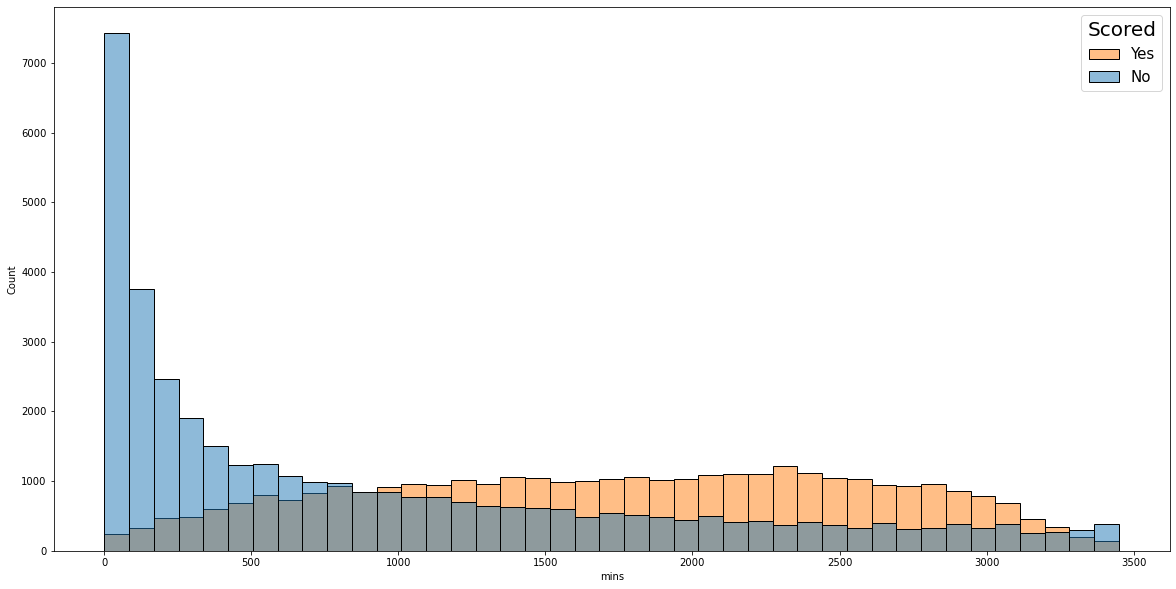

In [18]:
plt.figure(figsize=(20,10))
sns.histplot(df,x='mins',hue='goals_cat')
plt.legend(title='Scored', loc='upper right', labels=['Yes','No'],fontsize=15,title_fontsize=20)

Here we can see that out theory can be true. The distribution of minutes is more concentrated around 0 when the player didn´t score. The ones that didn´t score but played a normal amount of minutes can be defendes or goalkeepers.

In [19]:
# remove goals_cat 
df = df.drop('goals_cat',axis=1)

# replace nulls for 0
for x in to_float:
    df[x] = df[x].fillna(0)
    
df.isna().sum()

name                  0
club                  0
age                   0
position              0
apps                  0
mins                  0
goals                 0
assists               0
yel                   0
red                   0
shots                 0
ps%                   0
aerials_won           0
motm                  0
rating                0
tackles               0
interceptions         0
fouls                 0
offsides_won          0
clearances            0
dribbled              0
blocks                0
own_goals             0
key_passes            0
dribblings            0
fouled                0
offsides              0
dispossed             0
bad_controls          0
avg_passes            0
crosses               0
long_passes           0
through_passes        0
league                0
season                0
fee               55788
traded                0
club_position         0
position_cat          0
dtype: int64

The goal of this project is to predict the churn in football players based on their stats so the feature fee seems useless for this pourpouse.

In [20]:
df = df.drop('fee',axis = 1)

Now we have no null values in our dataframe. This was a naive approach but I believe that with the info that the function describe gave to us It was clear what was happening.

### Dependent variable

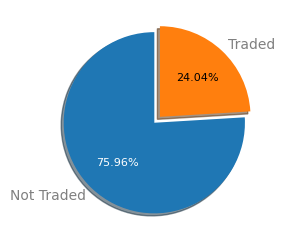

In [21]:
values = df.traded.value_counts()
labels = ['Not Traded','Traded']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

This shows that we are dealing with an imbalanced dataset, for each traded we have 4 not traded.

### Correlation

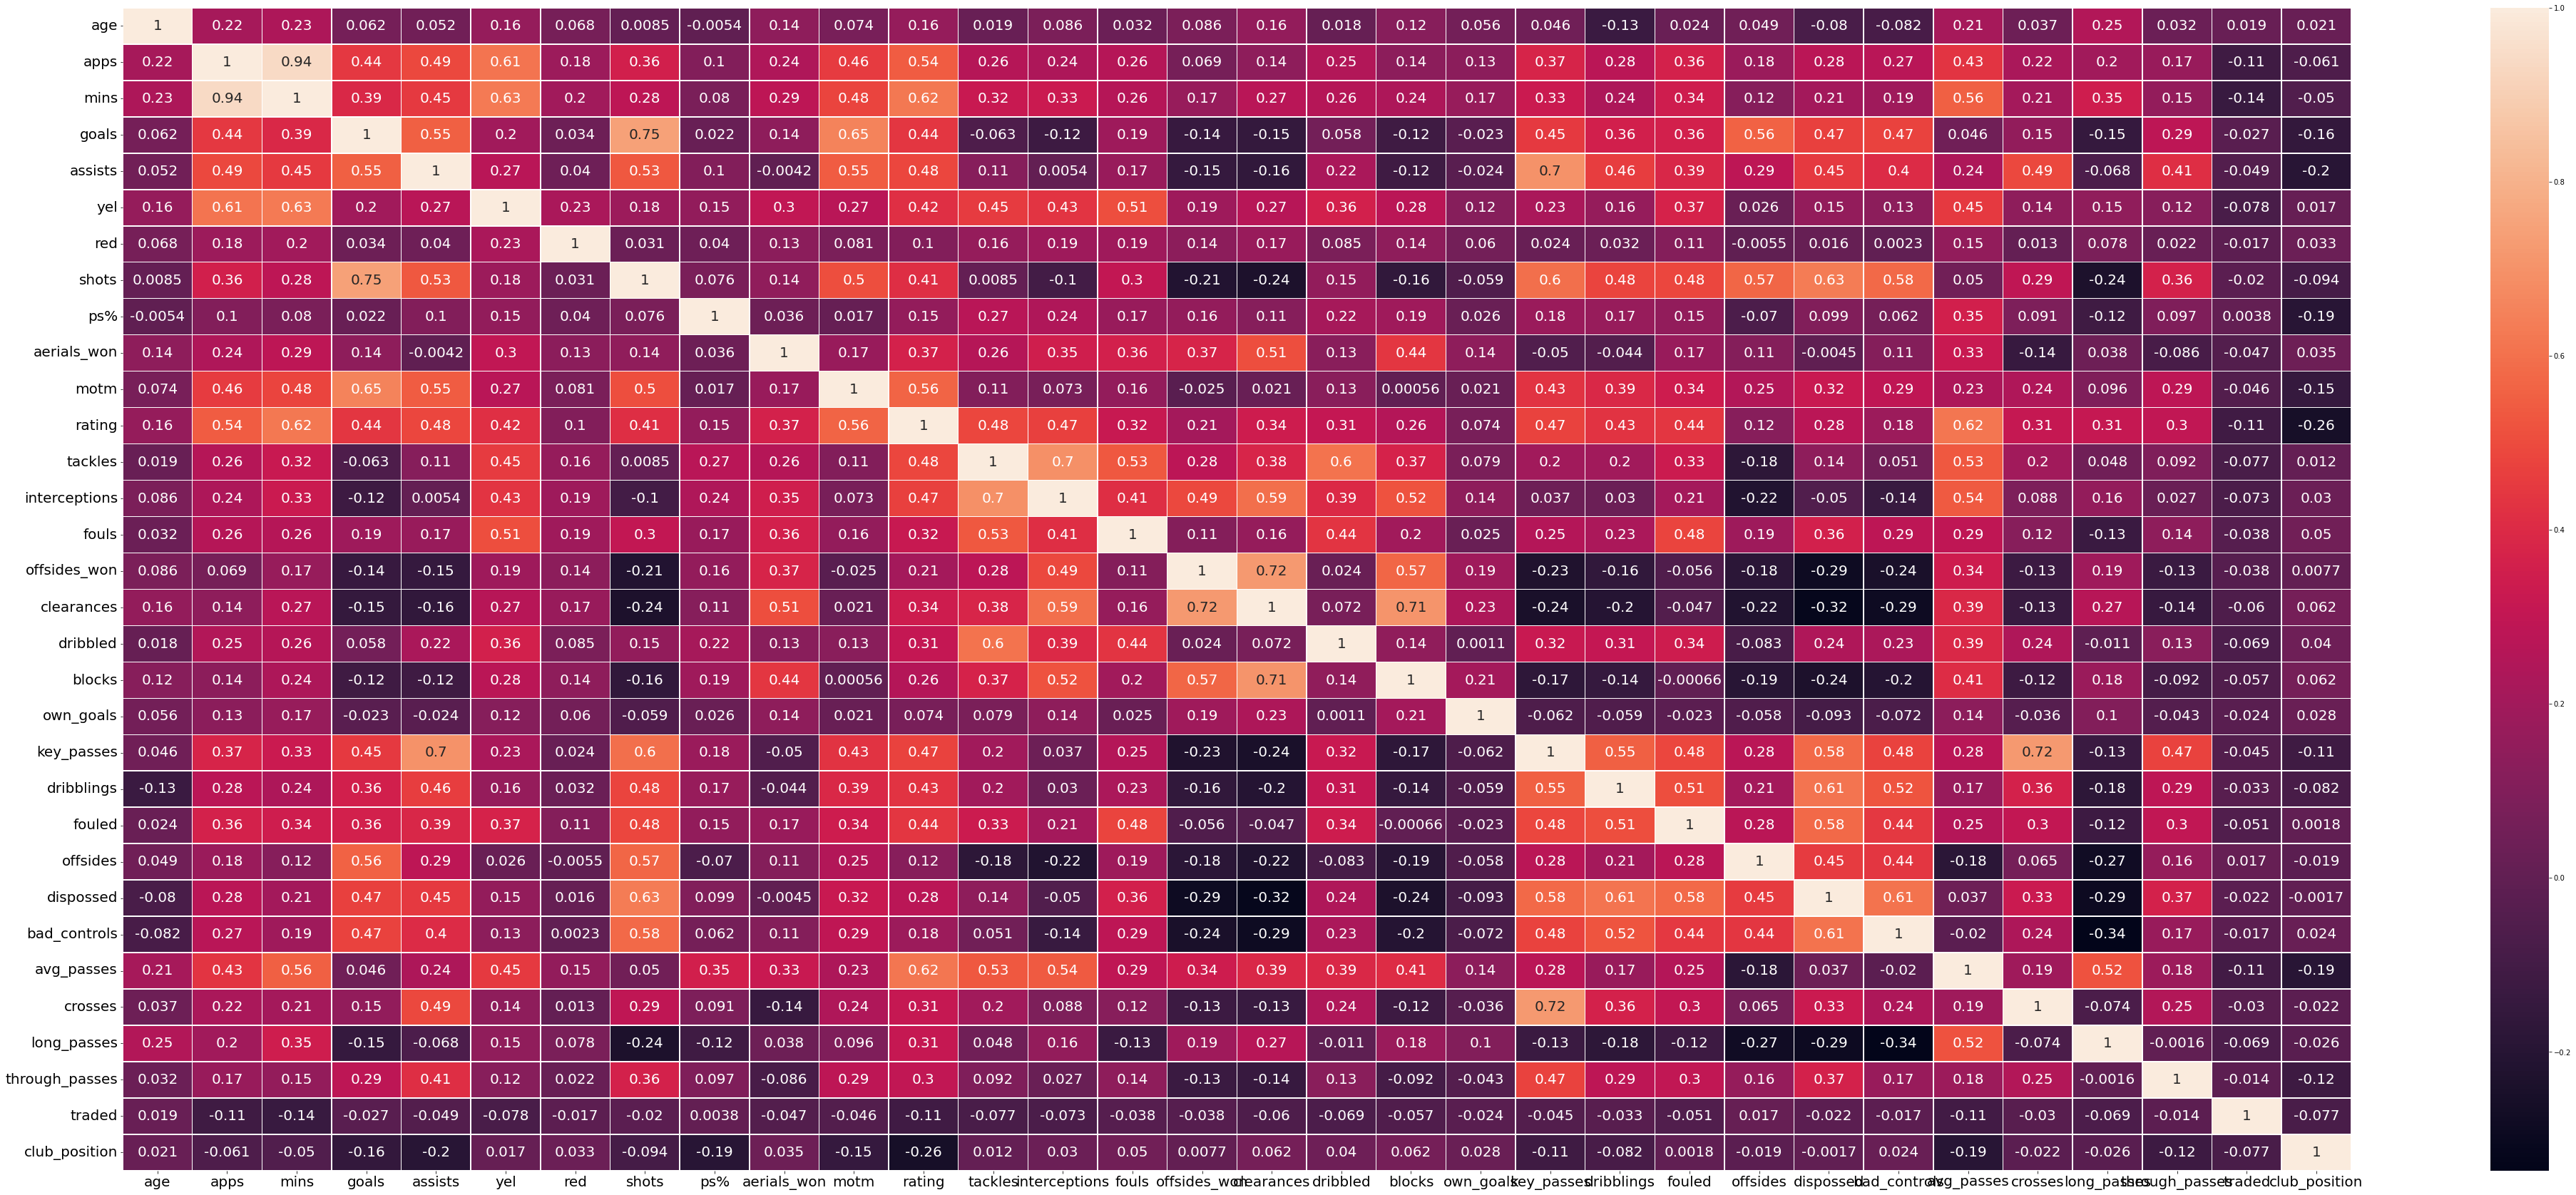

In [41]:
corr = df.corr()
plt.figure(figsize=(70,30))
heatmap = sns.heatmap(corr,linewidth=.5,annot=True,annot_kws={"fontsize":20})
heatmap.set_xticklabels(heatmap.get_xticklabels(), size = 20)
heatmap.set_yticklabels(heatmap.get_yticklabels(), size = 20)
plt.show()

From this analysis we can extract that:
* There is a big correlation between features. Multicolinearity is present.
* There is not a linear relation between the dependent variable and the independent features.

With that in mind probably a linear model will not be a good approach.

In [43]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df.corr())
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
table = get_top_abs_correlations(df, 10).to_frame()
cm = sns.light_palette("green", as_cmap=True)
tb = table.style.background_gradient(cmap=cm)
tb

Top Absolute Correlations


,,0
apps,mins,0.942123
goals,shots,0.745918
key_passes,crosses,0.721881
offsides_won,clearances,0.719153
clearances,blocks,0.706369
assists,key_passes,0.702357
tackles,interceptions,0.695509
goals,motm,0.652274
shots,dispossed,0.630005
mins,yel,0.628270


As we probably won´t  use a linear model I am not going to delete any feature. But It may be a good idea to use a dimensionality reduction technique.

### Categorical Features

In [47]:
def get_df_percentage(dataframe,x,y="traded"):
    perc = dataframe.groupby(x, observed=True)[y].value_counts(normalize=True).rename('percentage').mul(100).reset_index()
    perc.columns = perc.columns.str.replace('level_1',y)
    return perc

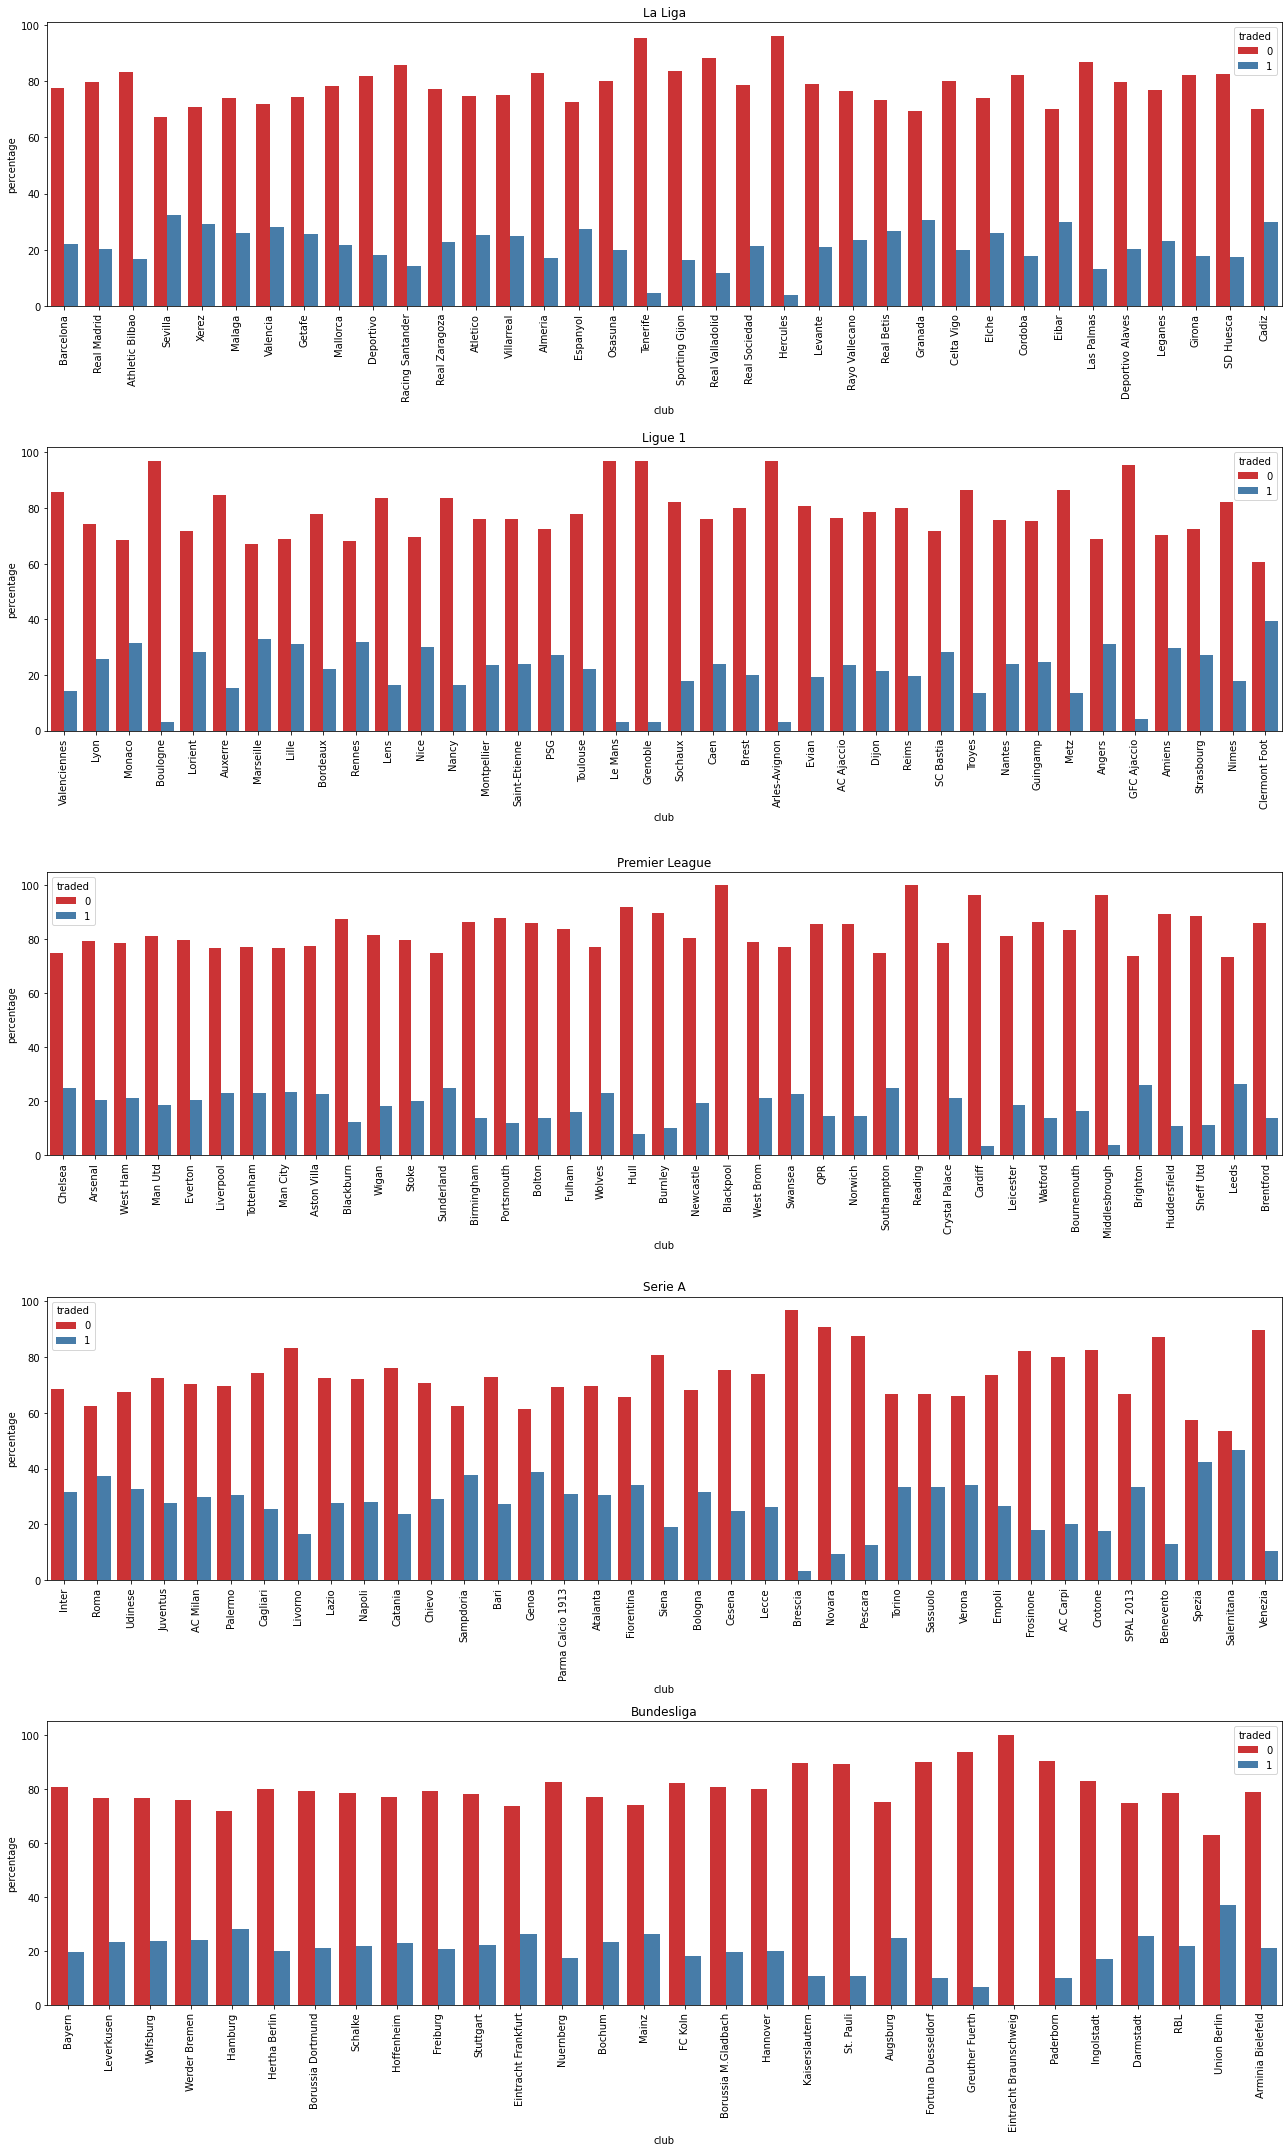

In [48]:
fig, ax = plt.subplots(5, 1, figsize = (18, 30))

clubs = df[df["league"] == "LaLiga"]
perc = get_df_percentage(clubs,"club")
ax1 = sns.barplot(data=perc,x="club", y = "percentage",hue="traded",palette='Set1',ax=ax[0])
ax1.set_title('La Liga')
_= plt.setp(ax1.get_xticklabels(),rotation=90)

clubs = df[df["league"] == "Ligue 1"]
perc = get_df_percentage(clubs,"club")
ax2 = sns.barplot(data=perc,x="club", y = "percentage",hue="traded",palette='Set1',ax=ax[1])
ax2.set_title('Ligue 1')
_= plt.setp(ax2.get_xticklabels(),rotation=90)

clubs = df[df["league"] == "Premier League"]
perc = get_df_percentage(clubs,"club")
ax3 = sns.barplot(data=perc,x="club", y = "percentage",hue="traded",palette='Set1',ax=ax[2])
ax3.set_title('Premier League')
_= plt.setp(ax3.get_xticklabels(),rotation=90)

clubs = df[df["league"] == "Serie A"]
perc = get_df_percentage(clubs,"club")
ax4 = sns.barplot(data=perc,x="club", y = "percentage",hue="traded",palette='Set1',ax=ax[3])
ax4.set_title('Serie A')
_= plt.setp(ax4.get_xticklabels(),rotation=90)

clubs = df[df["league"] == "Bundesliga"]
perc = get_df_percentage(clubs,"club")
ax5 = sns.barplot(data=perc,x="club", y = "percentage",hue="traded",palette='Set1',ax=ax[4])
ax5.set_title('Bundesliga')
_= plt.setp(ax5.get_xticklabels(),rotation=90)

plt.tight_layout()
plt.show()

There are a lot of teams with really low percentage of trades. I want to study this more by analyzing the teams by their league position.

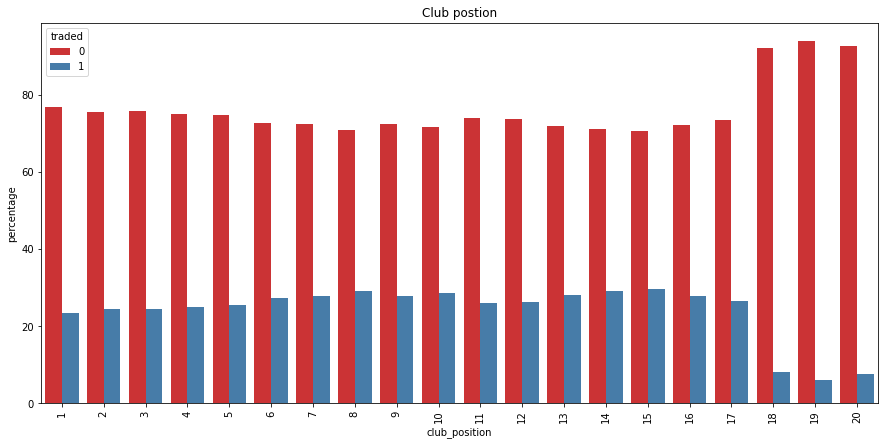

In [63]:
plt.figure(figsize=(15,7))
perc = get_df_percentage(df,"club_position")
ax1 = sns.barplot(data=perc,x="club_position", y = "percentage",hue="traded",palette='Set1')
ax1.set_title('Club postion')
_= plt.setp(ax1.get_xticklabels(),rotation=90)
plt.show()

As we can see, we have a problem. The last 3 teams have a really low trade ratio because the last 3 position of each league are relegated and we don´t have the data of the trades for this leagues. It is out of the scope of this project to obtaining so the best we can do is to delete de last 3 positions of each season. 

In [64]:
# Remove last 3 position
df = df[df['club_position'] < 18].copy()

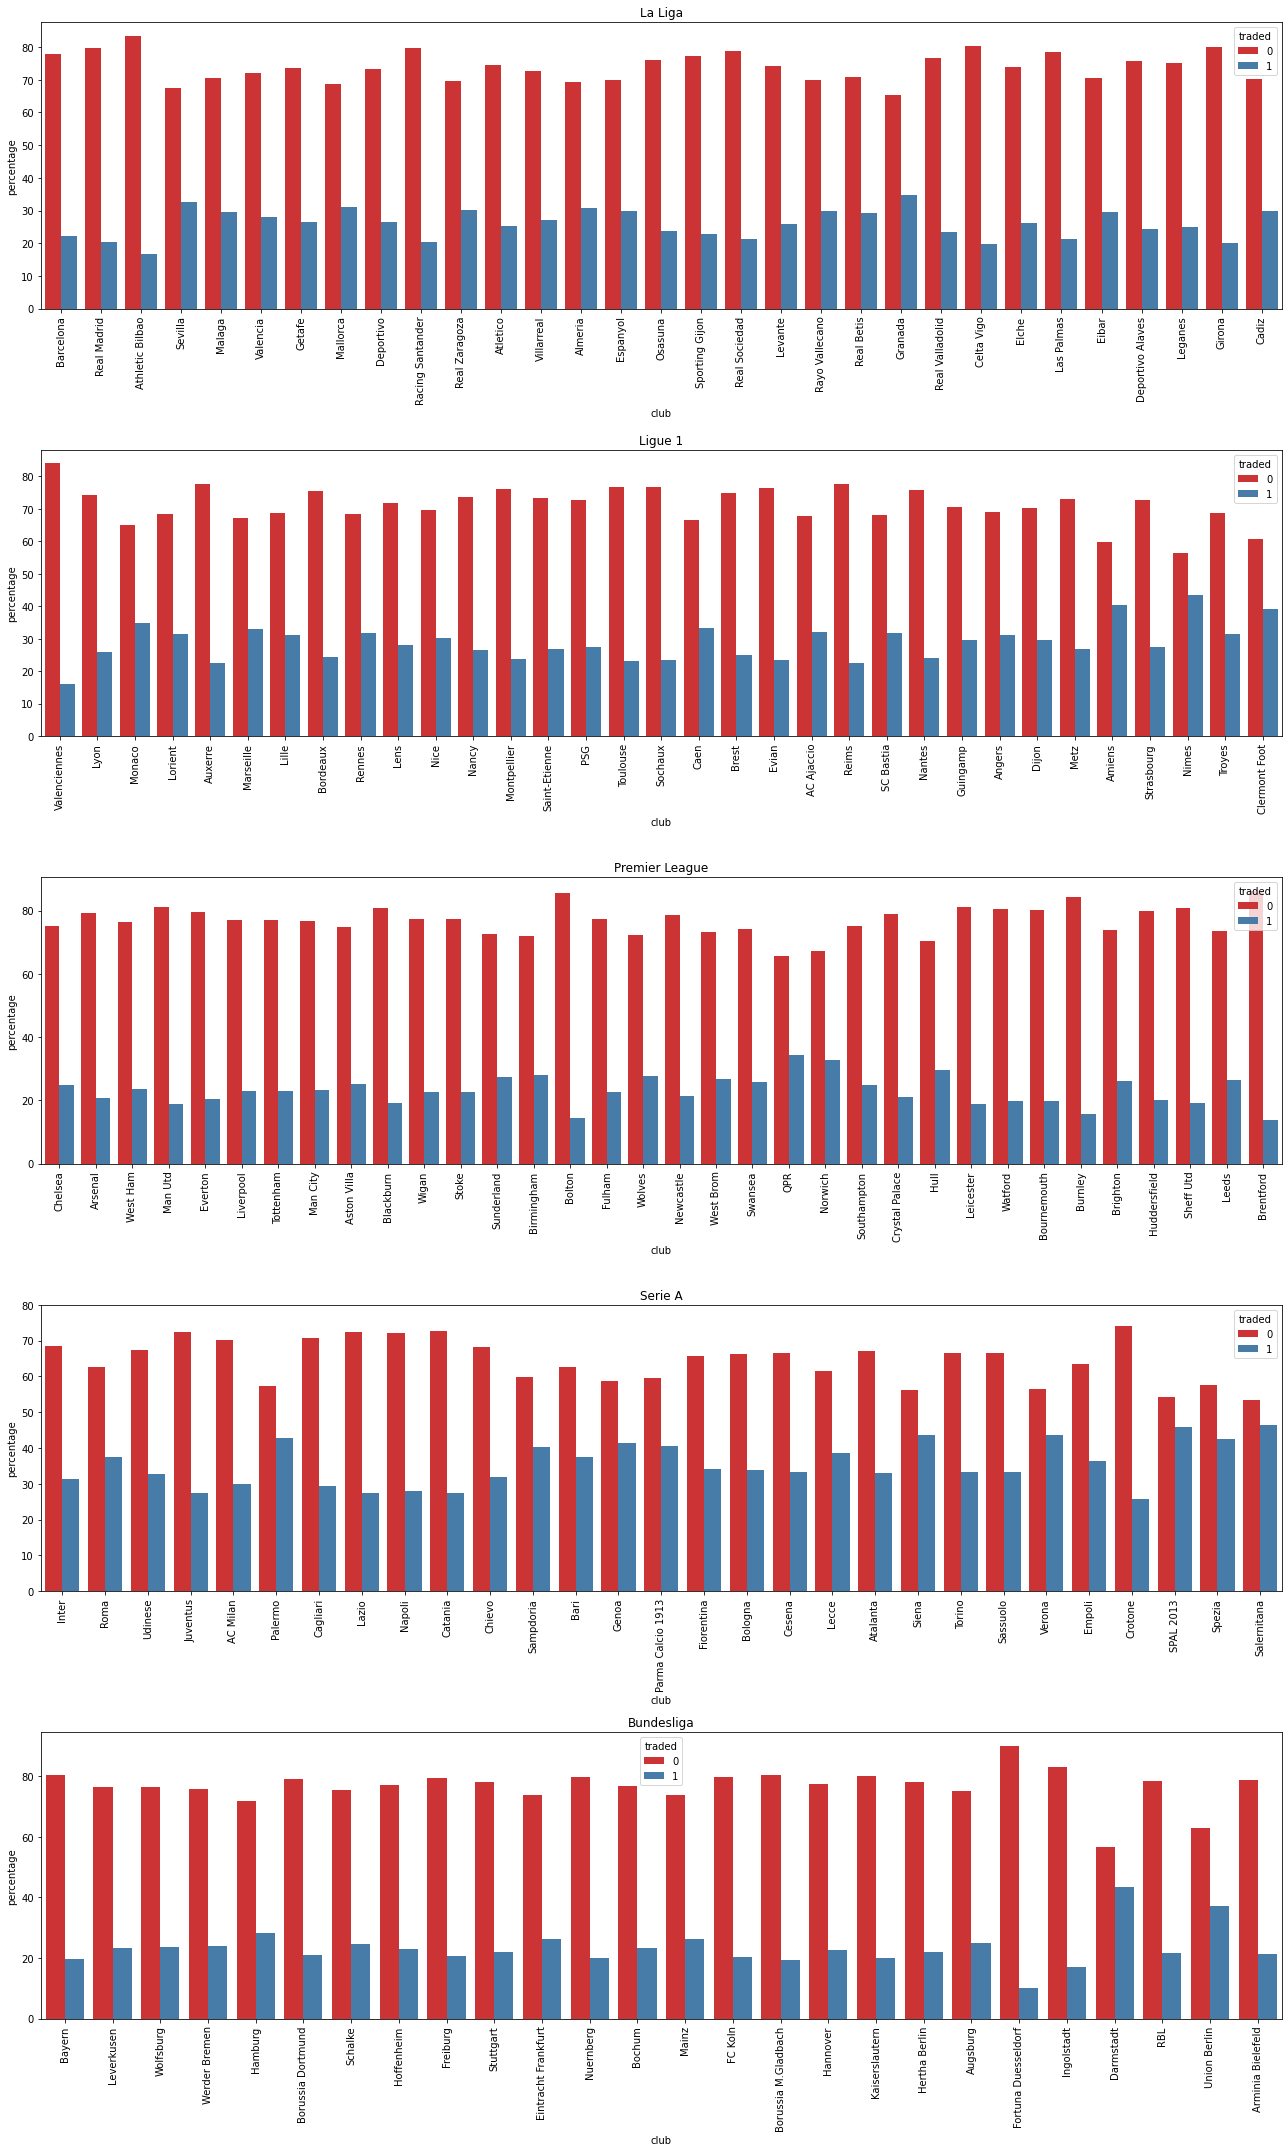

In [68]:
fig, ax = plt.subplots(5, 1, figsize = (18, 30))

clubs = df[df["league"] == "LaLiga"]
perc = get_df_percentage(clubs,"club")
ax1 = sns.barplot(data=perc,x="club", y = "percentage",hue="traded",palette='Set1',ax=ax[0])
ax1.set_title('La Liga')
_= plt.setp(ax1.get_xticklabels(),rotation=90)

clubs = df[df["league"] == "Ligue 1"]
perc = get_df_percentage(clubs,"club")
ax2 = sns.barplot(data=perc,x="club", y = "percentage",hue="traded",palette='Set1',ax=ax[1])
ax2.set_title('Ligue 1')
_= plt.setp(ax2.get_xticklabels(),rotation=90)

clubs = df[df["league"] == "Premier League"]
perc = get_df_percentage(clubs,"club")
ax3 = sns.barplot(data=perc,x="club", y = "percentage",hue="traded",palette='Set1',ax=ax[2])
ax3.set_title('Premier League')
_= plt.setp(ax3.get_xticklabels(),rotation=90)

clubs = df[df["league"] == "Serie A"]
perc = get_df_percentage(clubs,"club")
ax4 = sns.barplot(data=perc,x="club", y = "percentage",hue="traded",palette='Set1',ax=ax[3])
ax4.set_title('Serie A')
ax4.set_ylim(0, 80)
_= plt.setp(ax4.get_xticklabels(),rotation=90)

clubs = df[df["league"] == "Bundesliga"]
perc = get_df_percentage(clubs,"club")
ax5 = sns.barplot(data=perc,x="club", y = "percentage",hue="traded",palette='Set1',ax=ax[4])
ax5.set_title('Bundesliga')
_= plt.setp(ax5.get_xticklabels(),rotation=90)

plt.tight_layout()
plt.show()

The club seems an interesting feature because there is a big gap among clubs transfer ratio. The biggest clubs in Europe seems to rotate less their players, teams like Bayen, Barcelona and Real Madrid which is normal. Also there seems to be a big difference in the leagues being the Italian the one that trades the most.

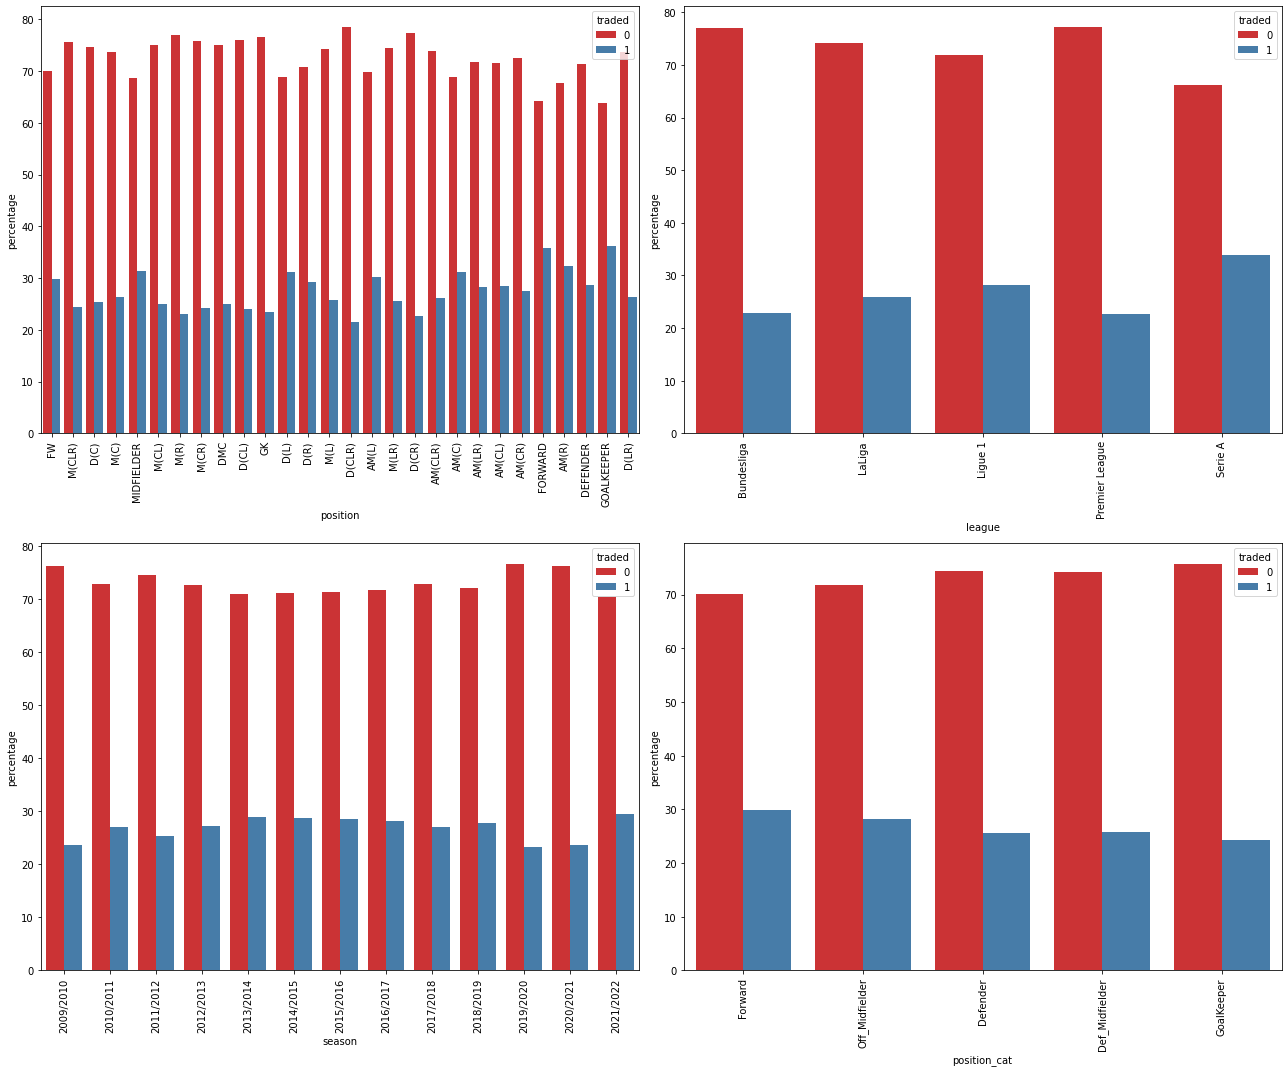

In [70]:
fig, ax = plt.subplots(2, 2, figsize = (18, 15))

perc = get_df_percentage(df,x="position")
ax1 = sns.barplot(data=perc,x="position", y = "percentage",hue="traded",palette='Set1',ax=ax[0][0])
_= plt.setp(ax1.get_xticklabels(),rotation=90)

perc = get_df_percentage(df,"league")
ax2 = sns.barplot(data=perc,x="league", y = "percentage",hue="traded",palette='Set1',ax=ax[0][1])
_= plt.setp(ax2.get_xticklabels(),rotation=90)

perc= get_df_percentage(df,"season","traded")
ax3 = sns.barplot(data=perc,x="season", y = "percentage",hue="traded",palette='Set1',ax=ax[1][0])
_= plt.setp(ax3.get_xticklabels(),rotation=90)

perc = get_df_percentage(df,"position_cat")
ax4 = sns.barplot(data=perc,x="position_cat", y = "percentage",hue="traded",palette='Set1',ax=ax[1][1])
_= plt.setp(ax4.get_xticklabels(),rotation=90)





plt.tight_layout()
plt.show()


From the categorical features we can learn that:
* We can´t use the last 3 clubs due to data lacking
* The club and league have some importance
* The position has more variance than the position_cat. For analysis reasonm we will keep the last one but for the model we will use the position feature.
* We can´t use the season as a feature because that will add information that we won´t have. We won´t know the ratio of trades on a summer that didn´t finish. we will keep momentanially it for analysis reasons.

### Numerical Features

In [75]:
# get numerical features
numeric = df._get_numeric_data()
numeric = numeric.drop('traded',axis = 1)

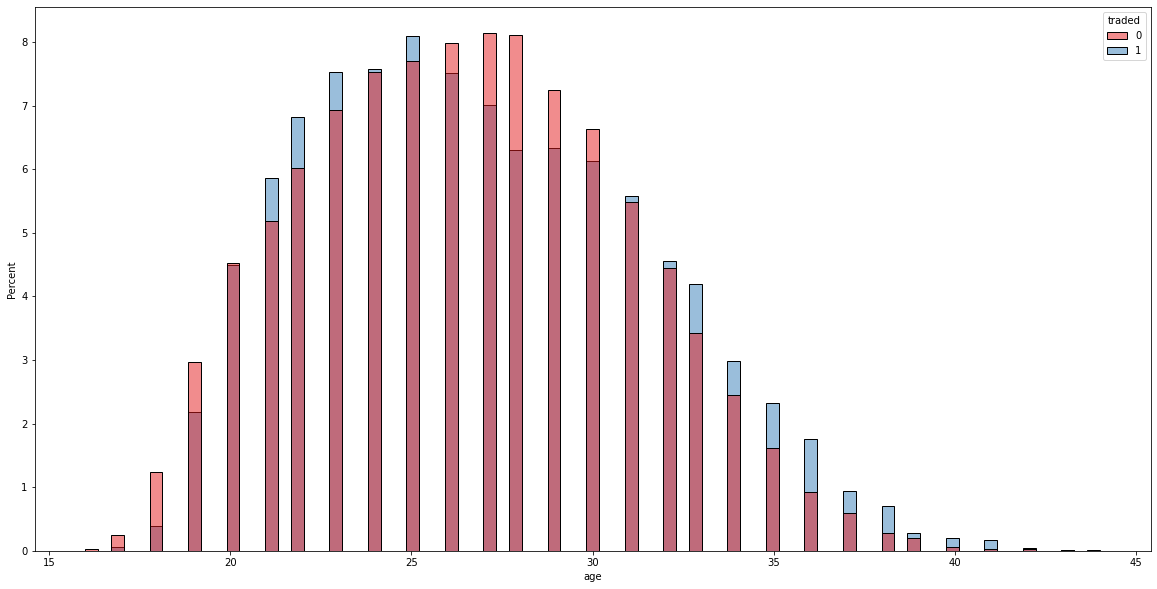

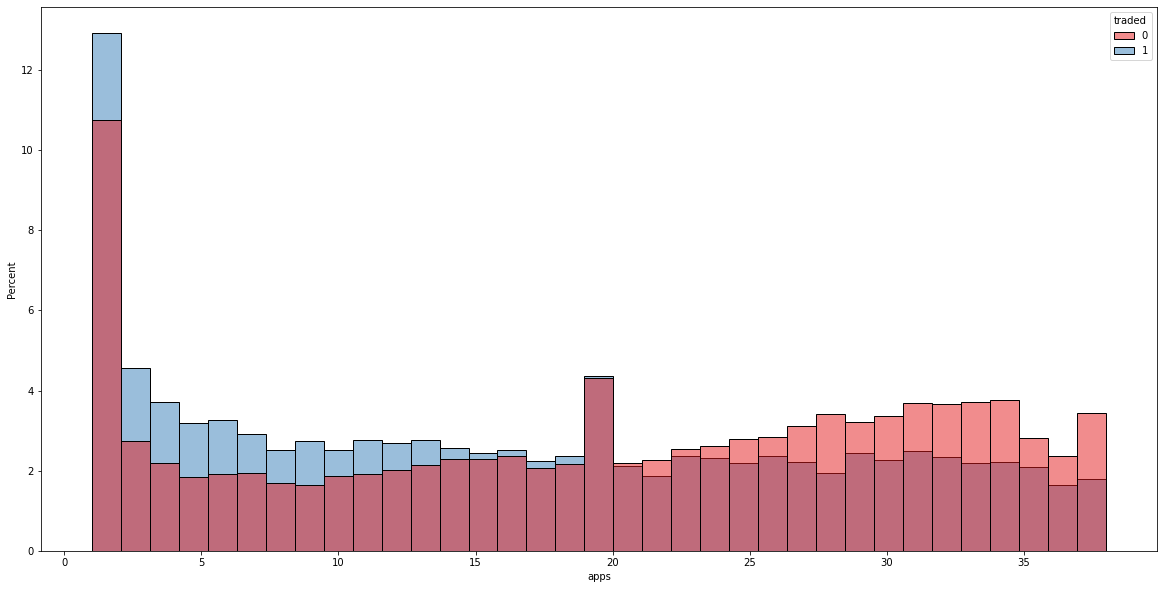

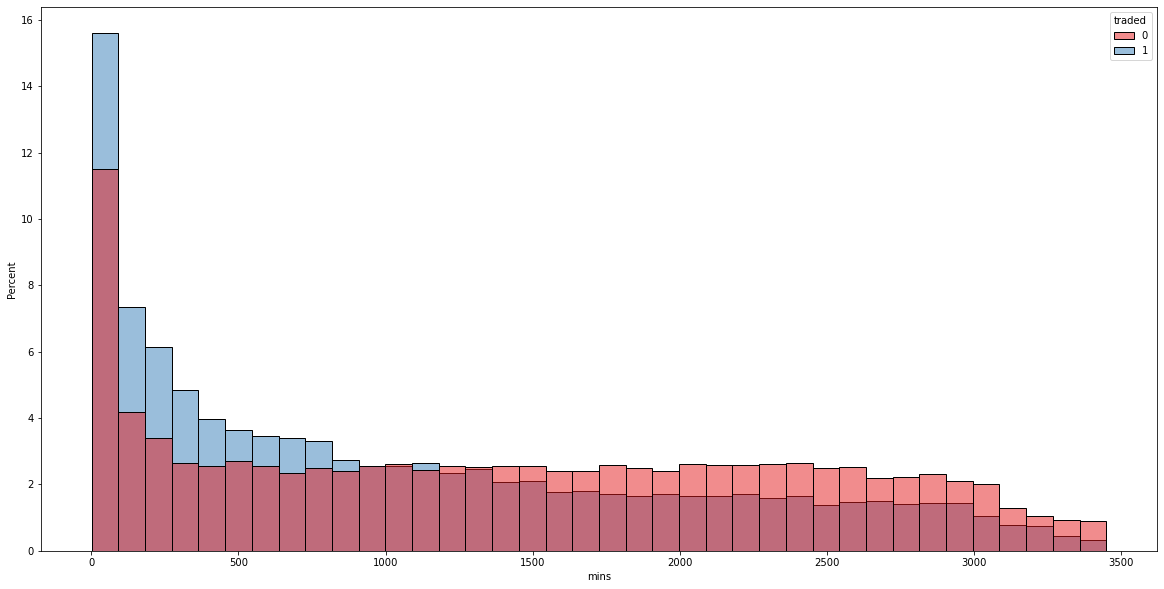

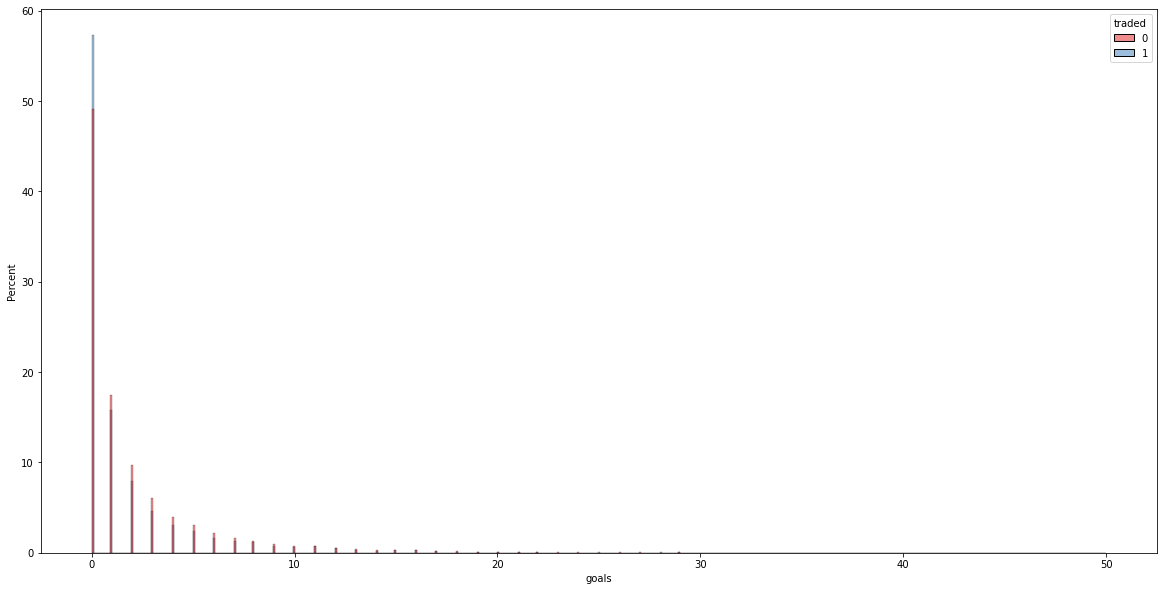

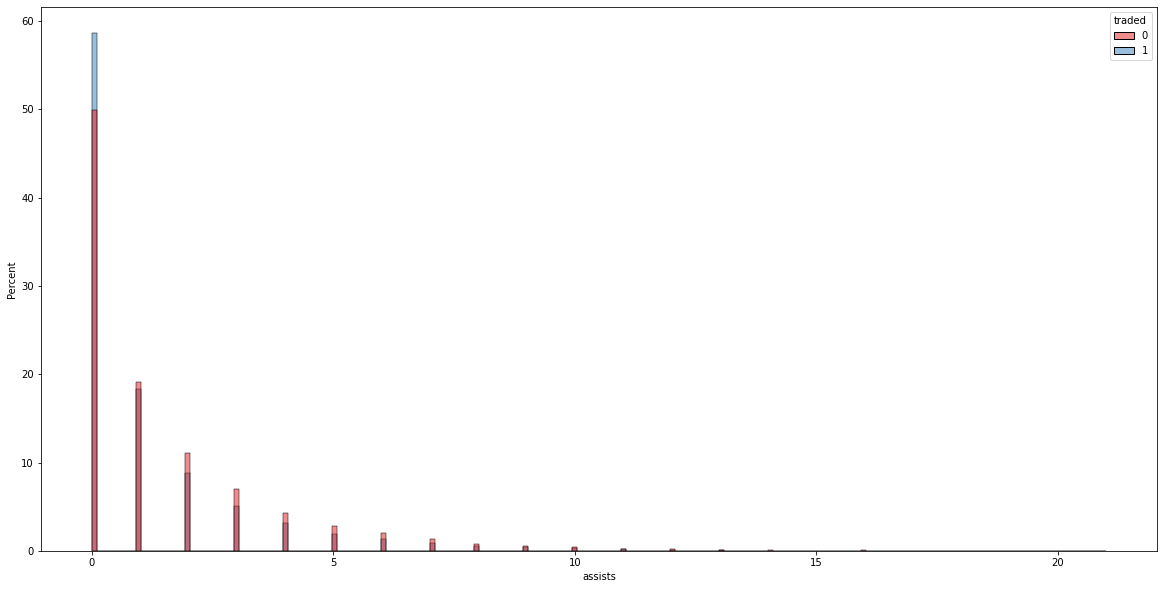

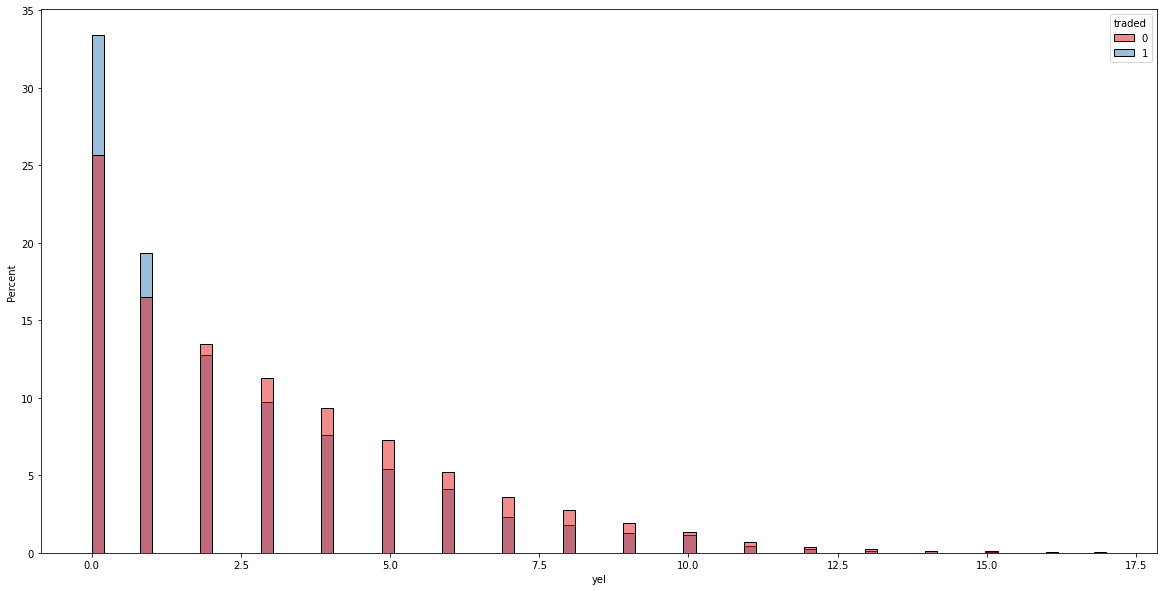

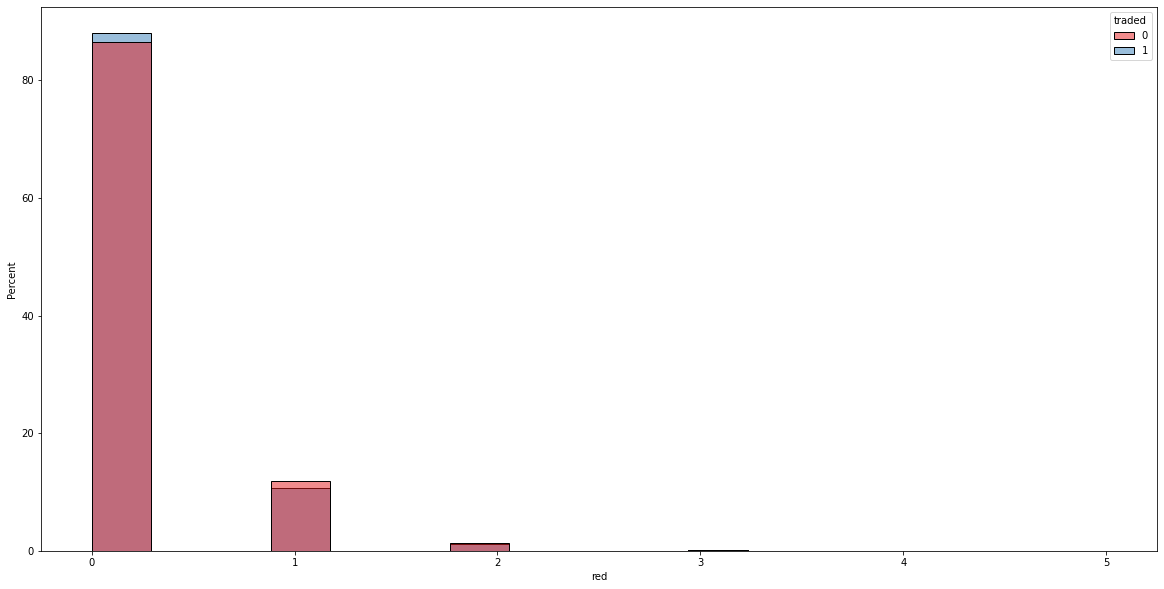

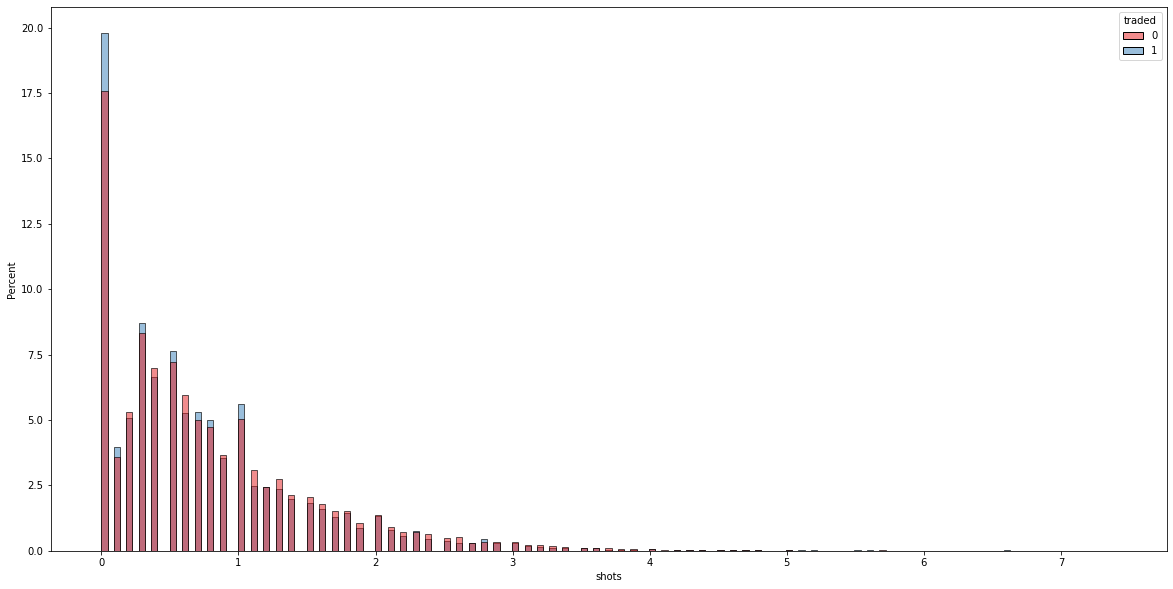

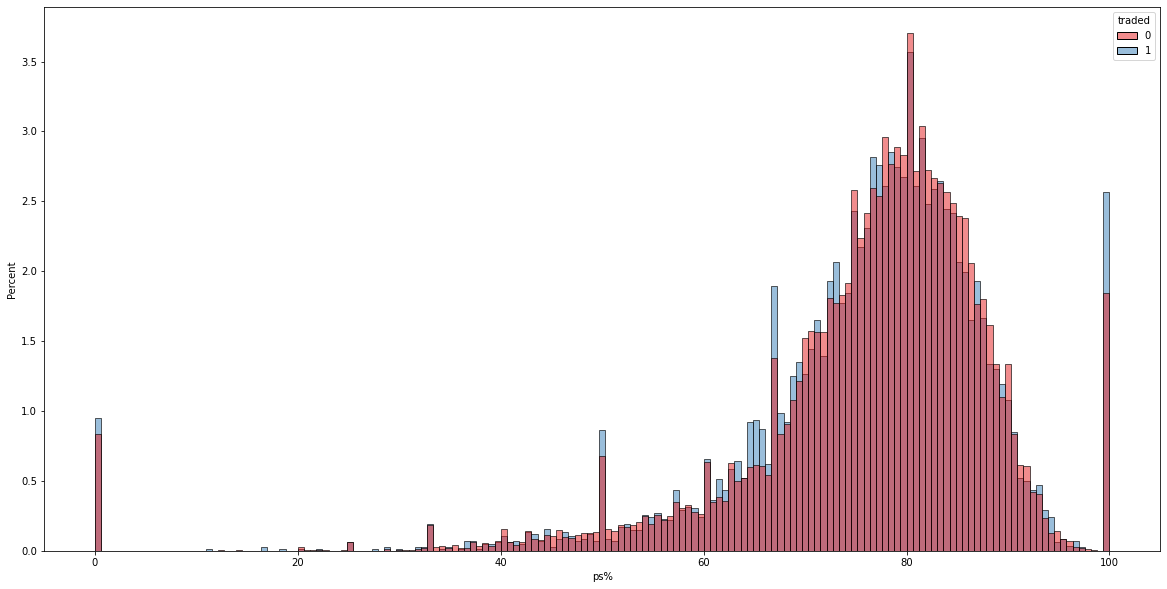

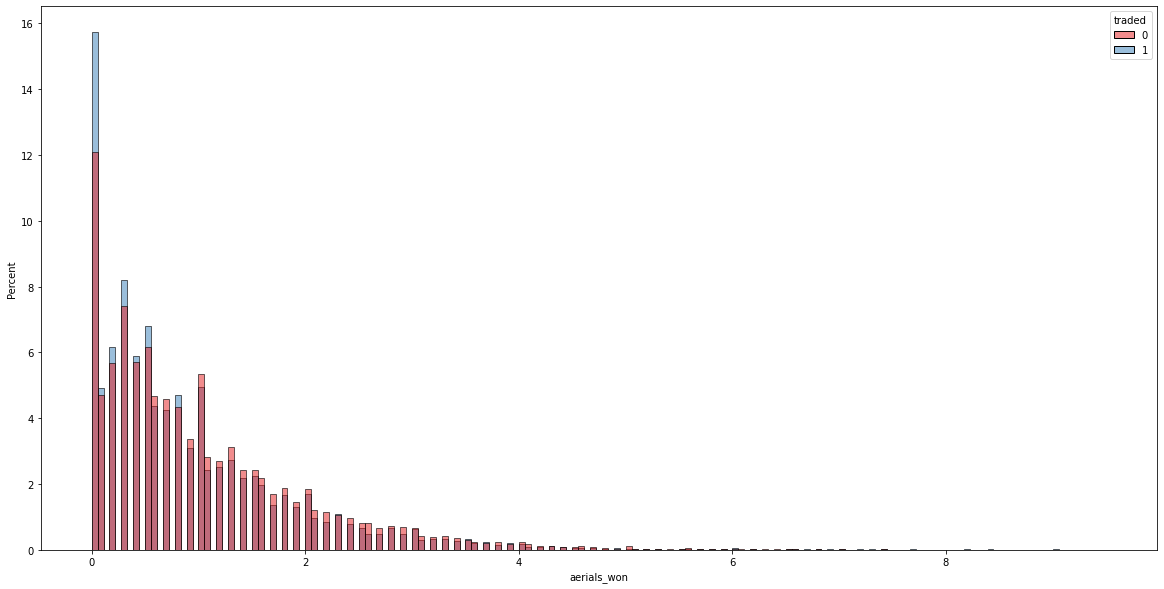

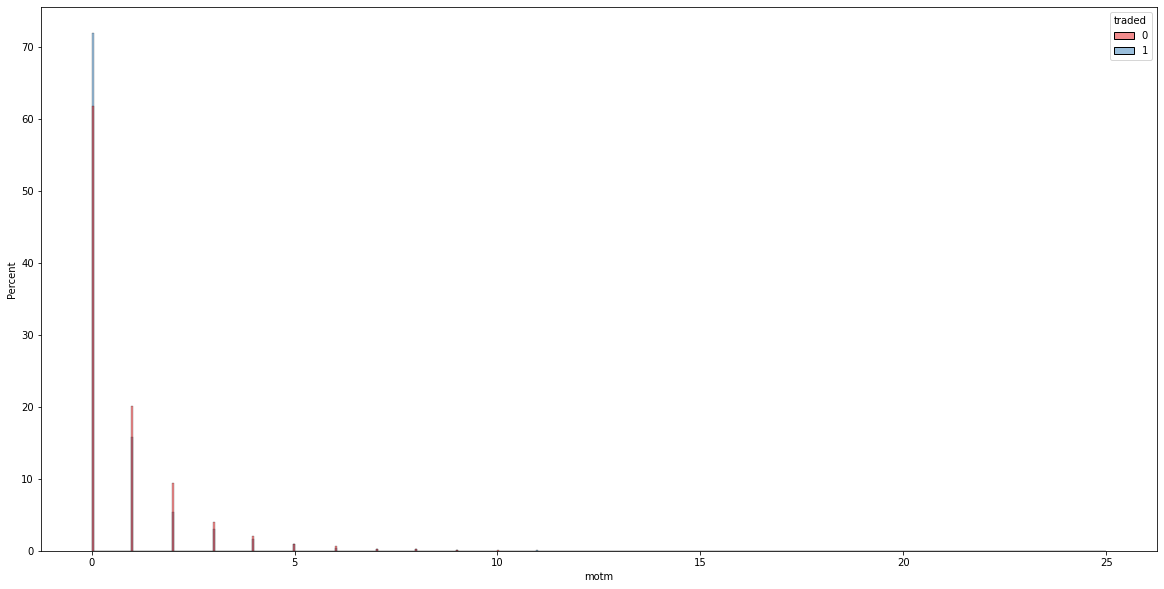

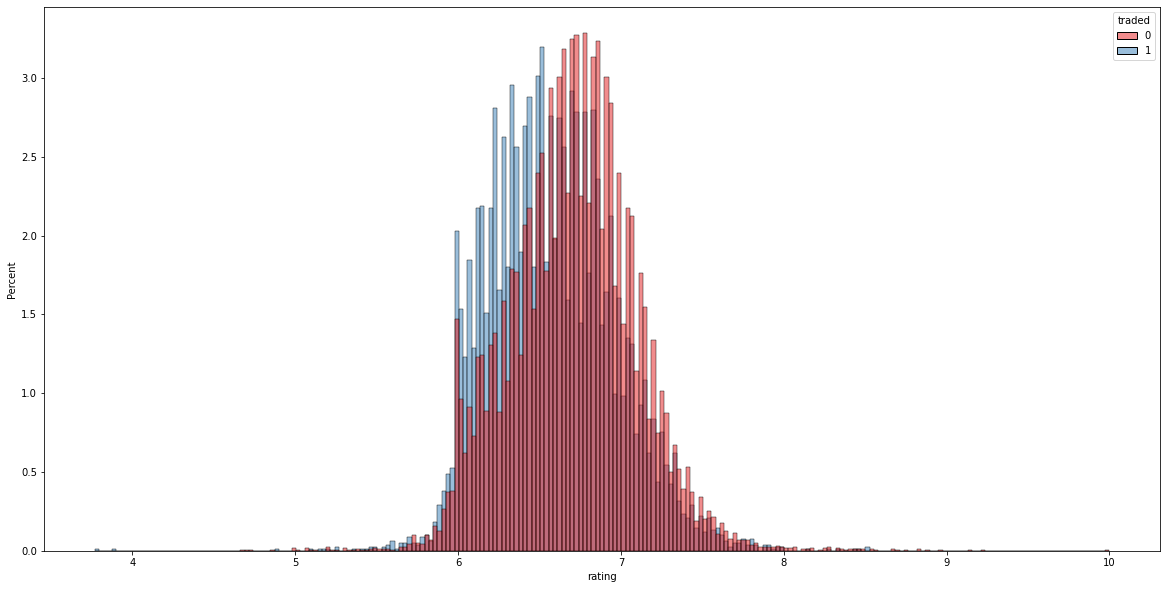

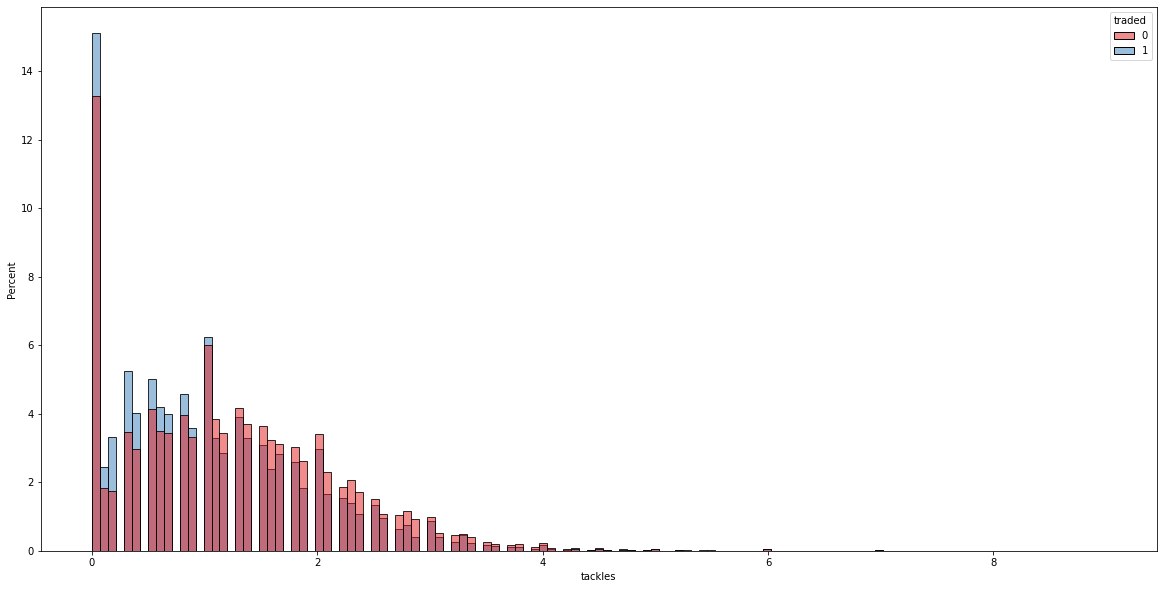

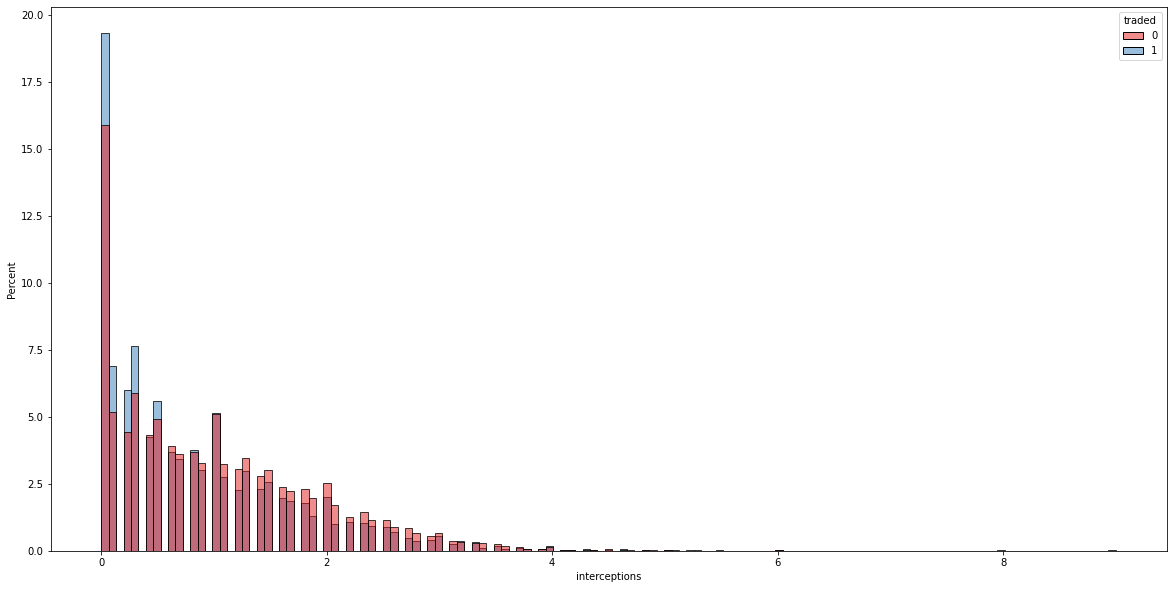

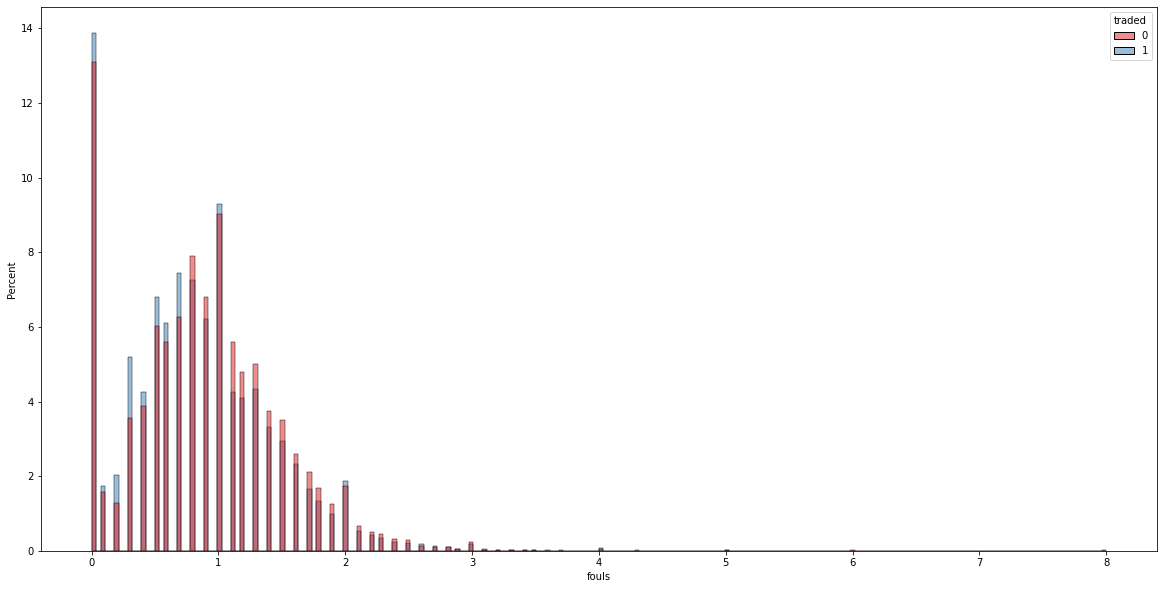

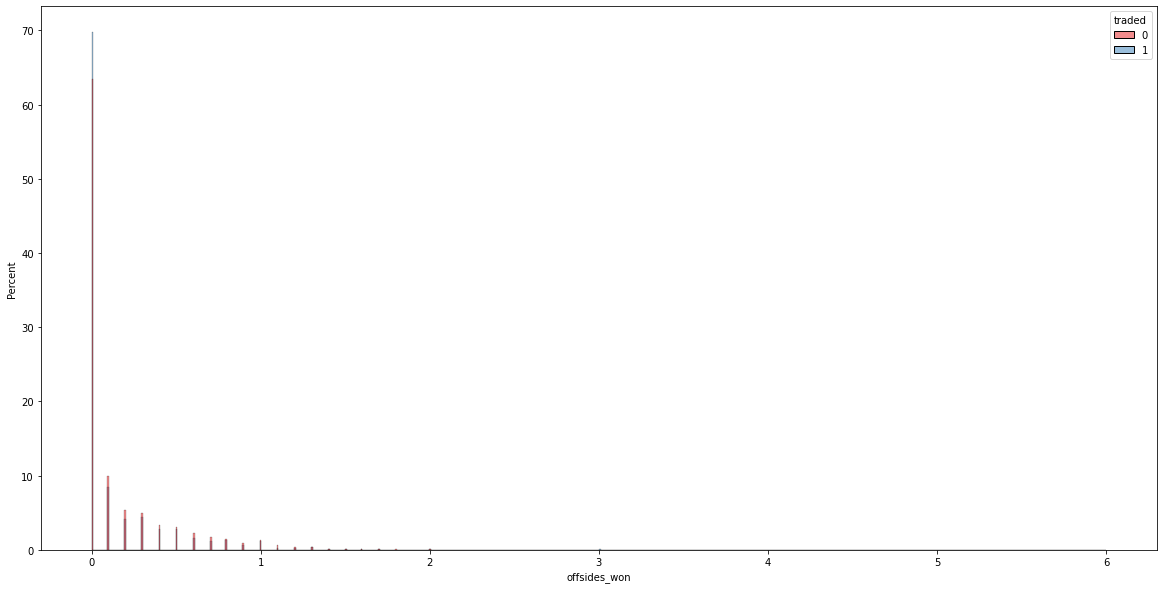

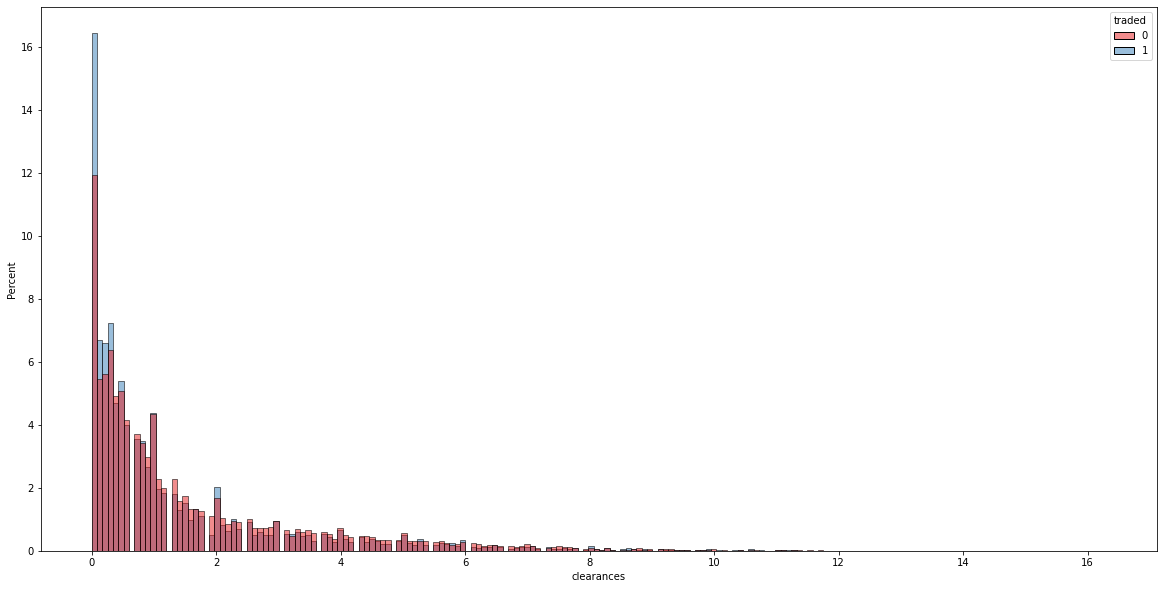

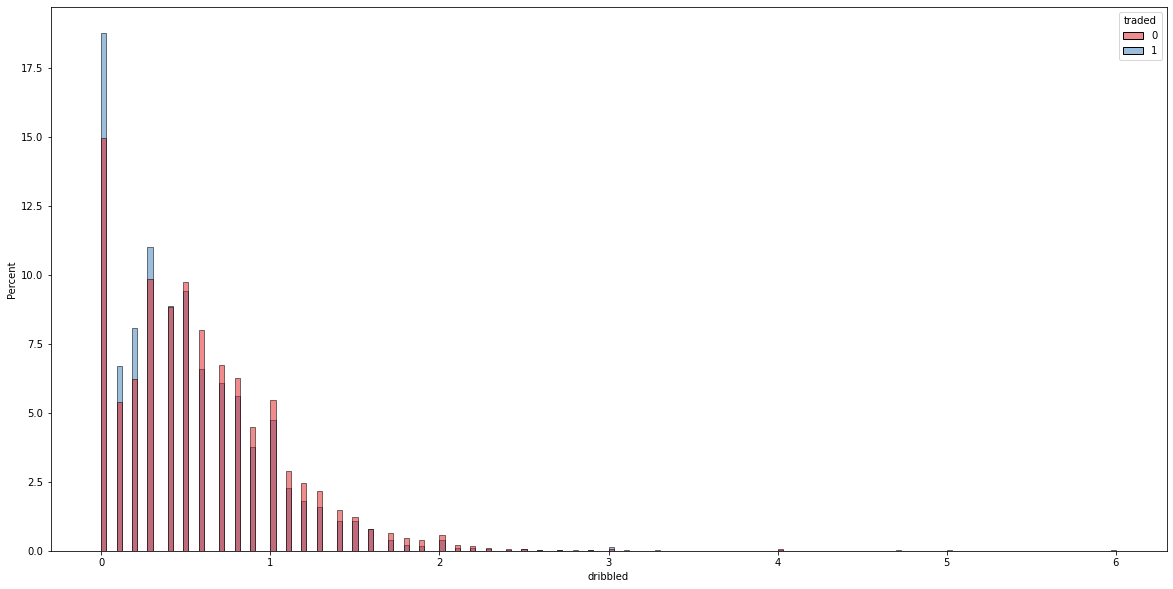

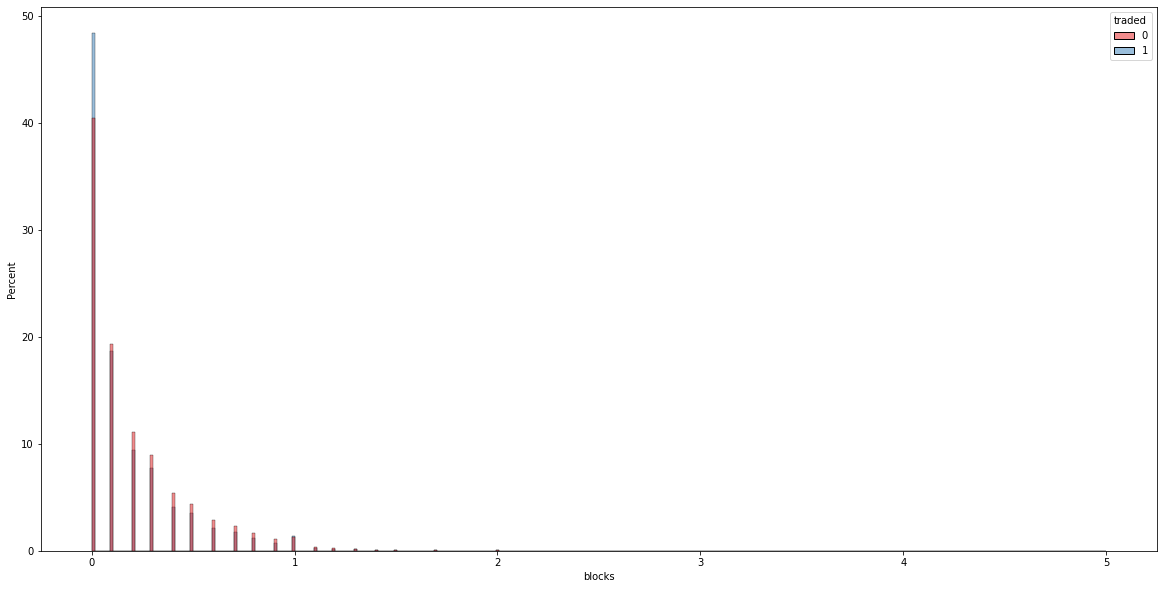

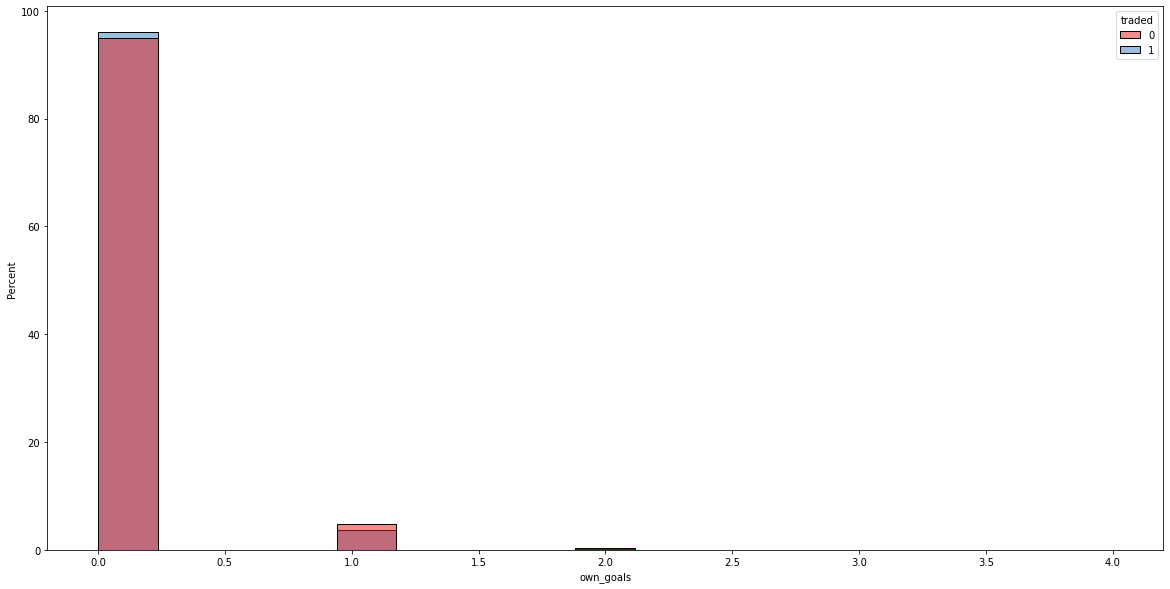

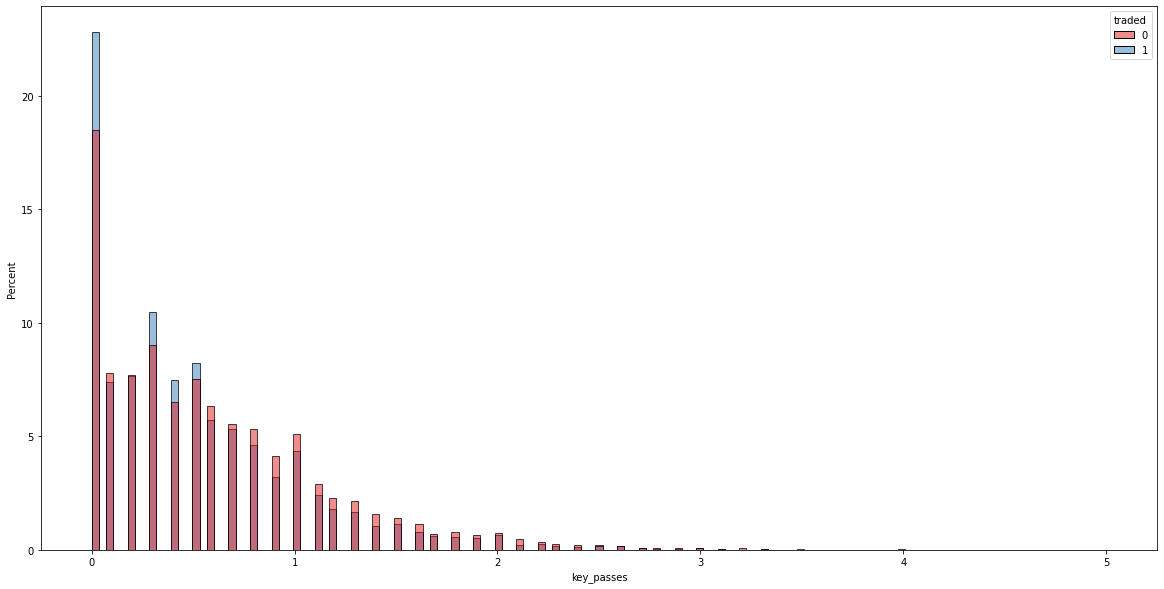

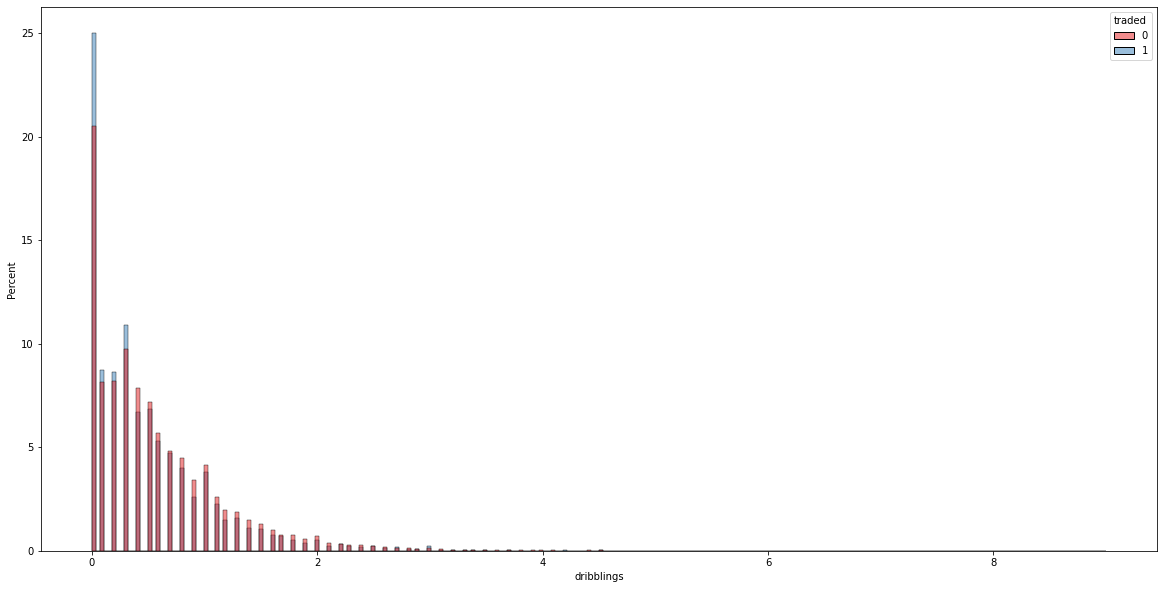

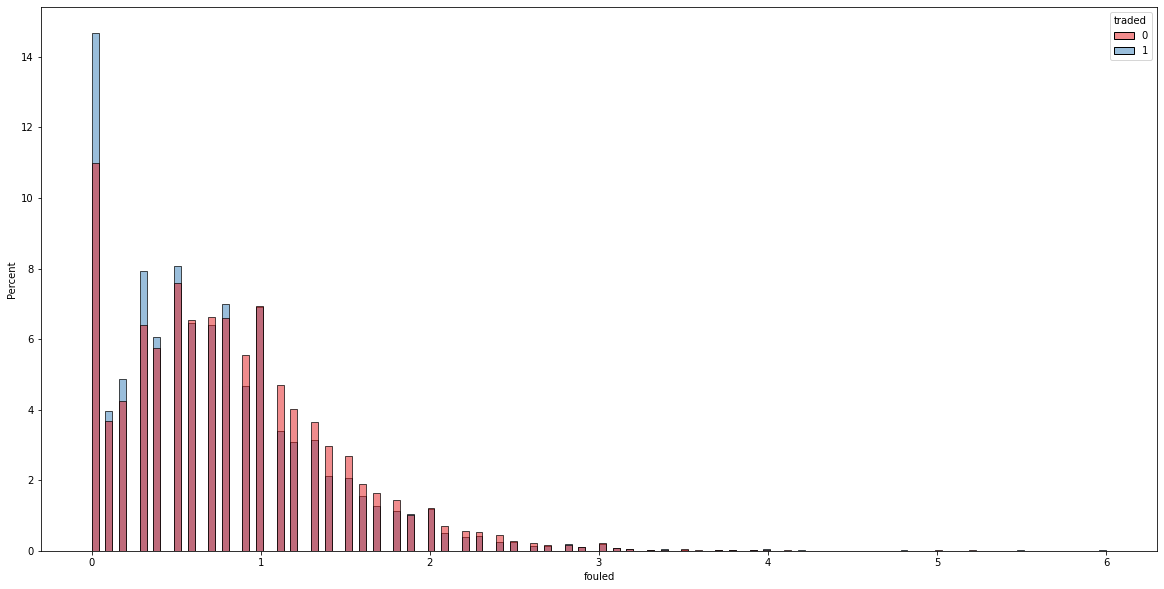

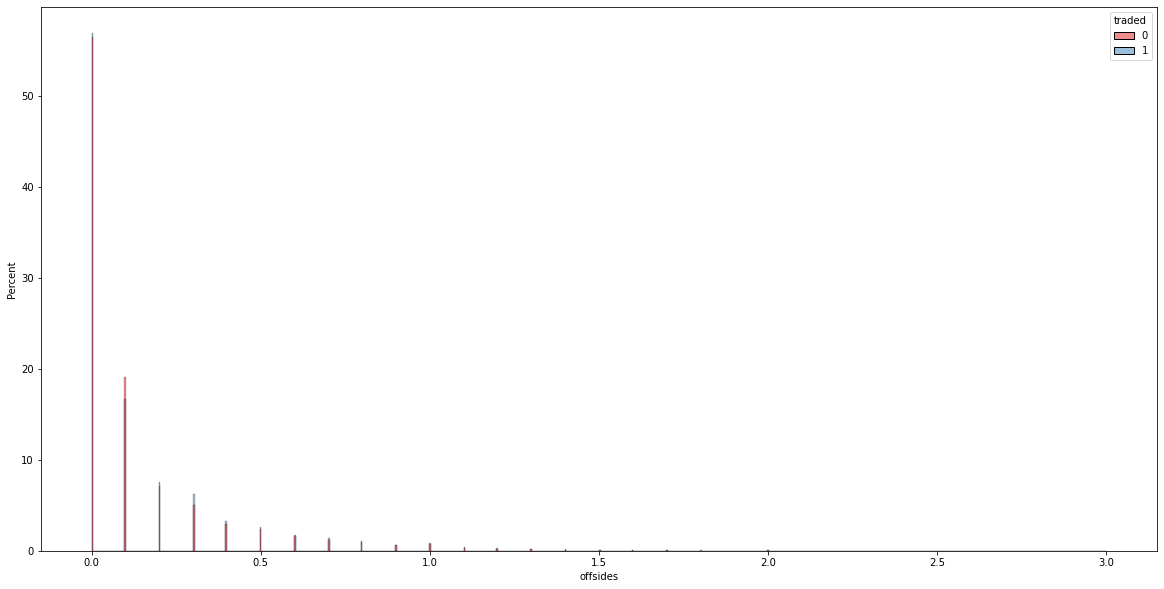

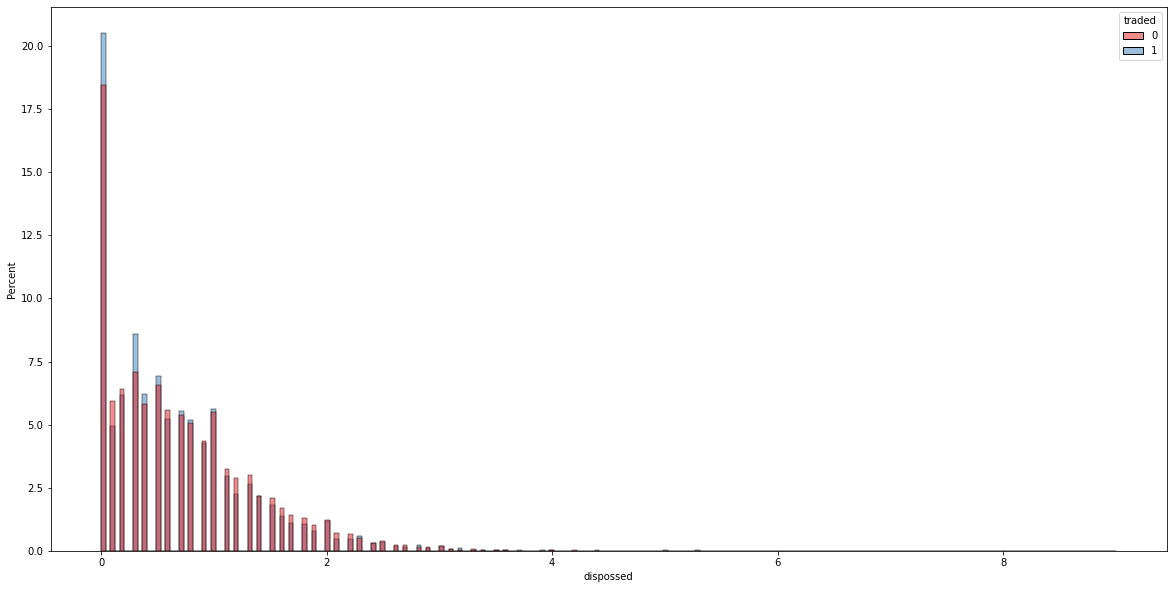

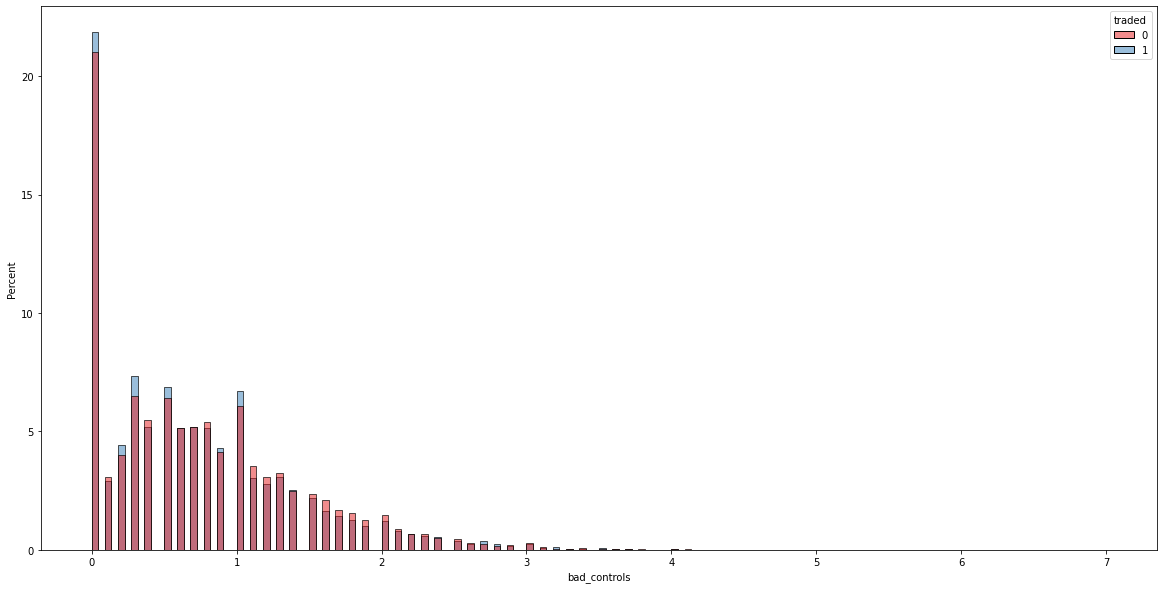

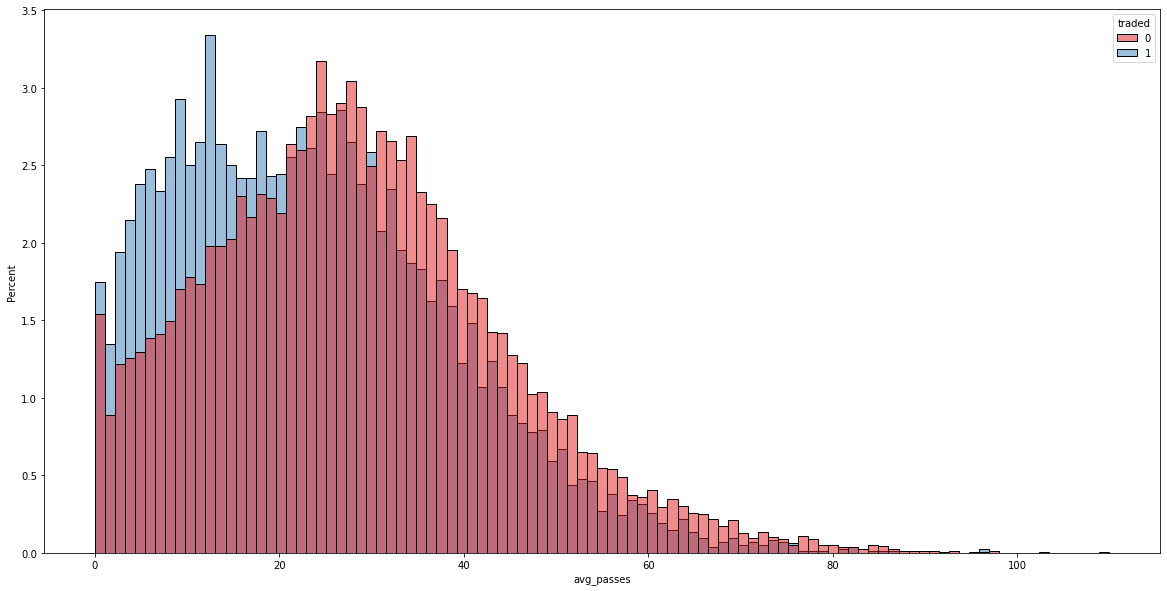

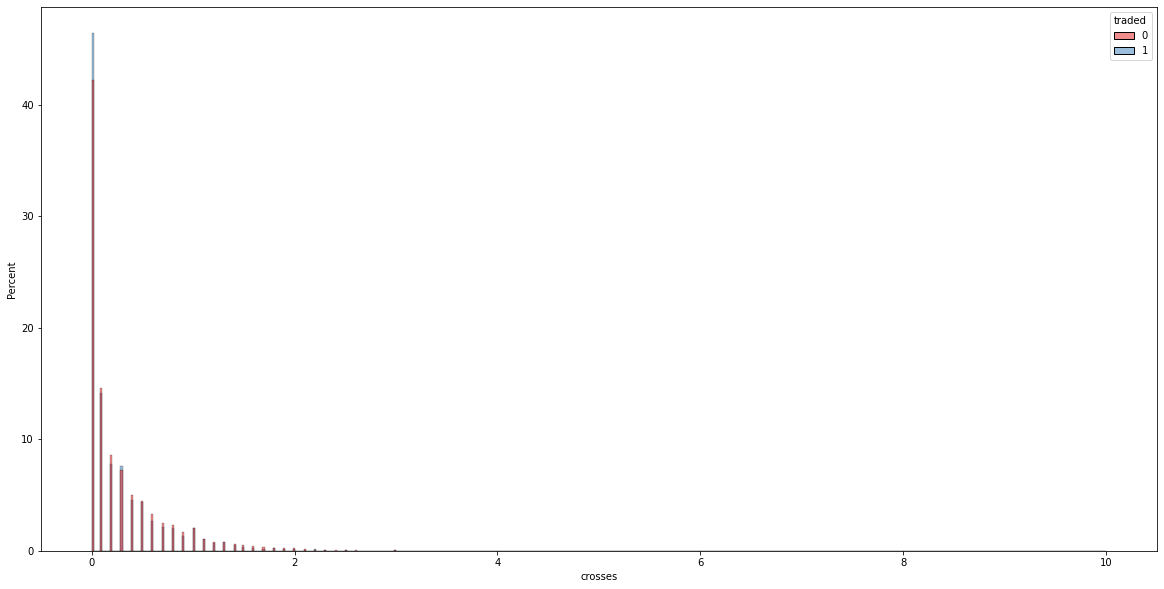

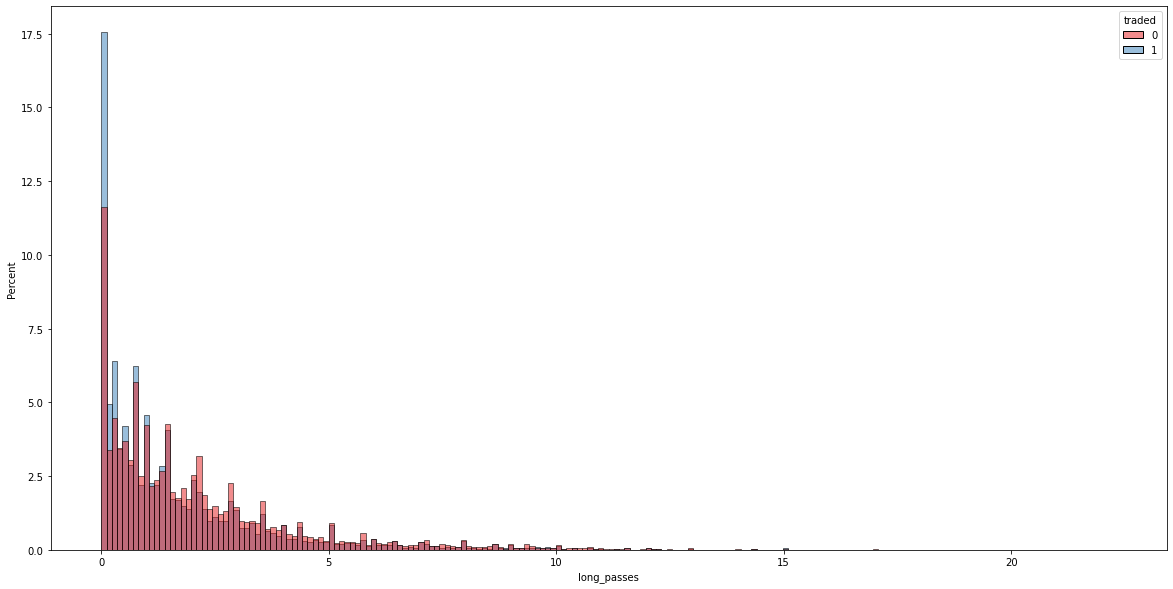

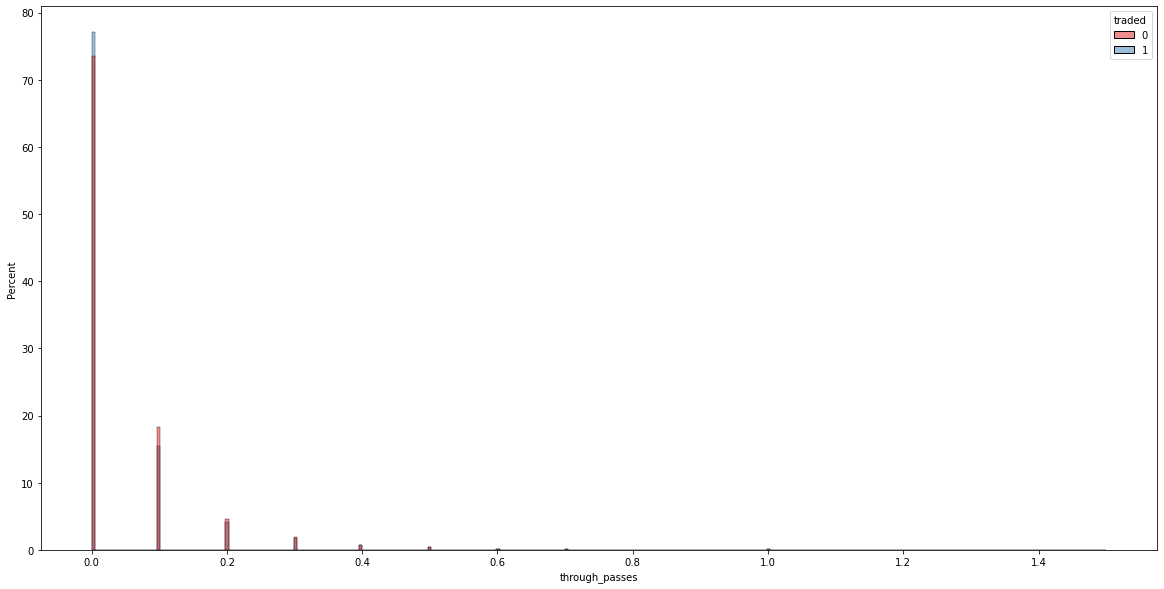

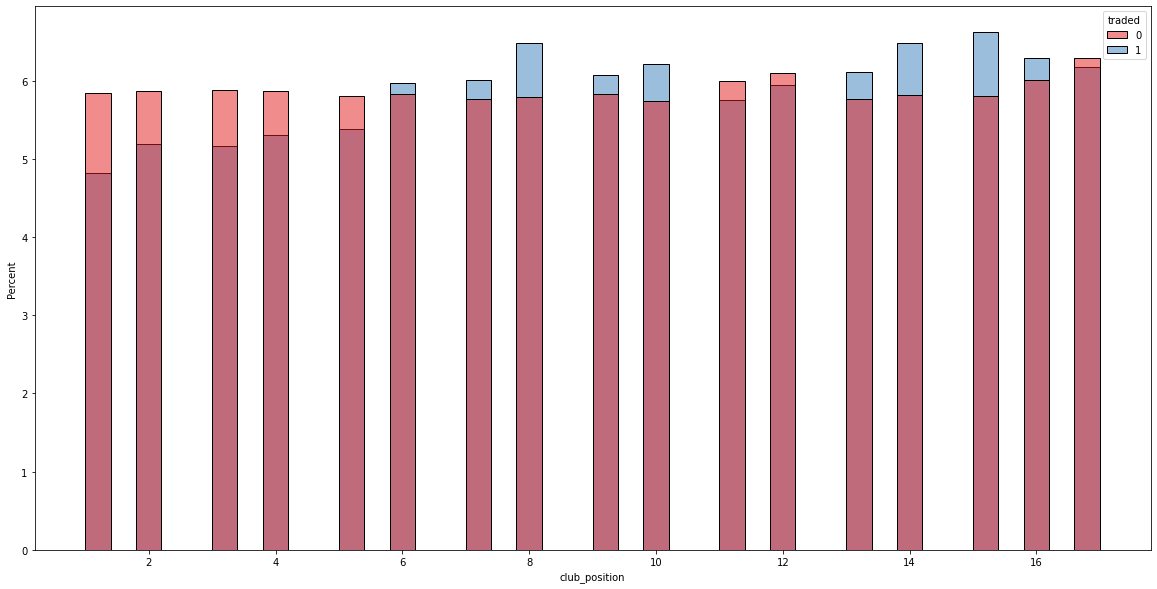

In [76]:
for x in numeric:
    plt.figure(figsize=(20,10))
    sns.histplot(data=df,x=x,hue='traded',stat='percent',common_norm=False,palette='Set1')
    plt.show()

Nota para mi: Categorizar edad y posición del club. Tambien estudiar que hacer con el restode variables discretas como goles, assists etc